# Isolated Sea Ice and CO2 influence

## Compute paper figures

1. Schematic (a,b), and quadrilateral (c)
2. SAT for ICE, CO2, SUM, FULL (and % var explained by sum) (a,b,c,d)
   SLP for ICE, CO2, SUM, FULL (and % var explained by sum) (e,f,g,h)
3. Seasonal cycle of measure of linearity (pattern corr and/or RMSE) for SAT, SLP, dTzonal
4. dTzonal for ICE, CO2 (a,b)<br>
   dUzonal for ICE, CO2 (c,d)<br>
   dZzonal (or Z500?) for ICE, CO2 (e,f)<br>
   U850?<br>
   PHT?<br>
   
   
Also compute pattern corr and/or RMSE for fourier filtered data (waves 1-10 or whatever)


In [11]:
import cccmautils as cutl
import constants as con
import pandas as pd
import numpy.ma as ma
import scipy.io as sio
import matplotlib.lines as mlines

import loadCanESM2rlxdata as lrlx

%matplotlib inline

domonth=False
sea='DJF'
mo=1 # mo is 1-based
last='last200' # else 'last100', 'first100'
includeyr1=False # only used when first100

suff = last+'yr'
if domonth:
    seasonalizedt={'mo':mo}
else:
    seasonalizedt={'season':sea}

if last=='last200': fldsfx='NH'

zconv = 1/con.get_g()


casenames = ('preipreiice', 'prei2xco2iceb','pi2xco2ipulse', '2xco22xco2ice','2xco2preiice')
shortnames = {'preipreiice': '1C_1I',
             'prei2xco2iceb': '1C_2I',
             'pi2xco2ipulse': '1C_2Ipulse',
             '2xco22xco2ice': '2C_2I',
             '2xco2preiice': '2C_1I'}

colors = {'preipreiice': 'k', 'prei2xco2iceb': 'b', 
            'pi2xco2ipulse': 'cyan', '2xco22xco2ice': 'r',
            '2xco2preiice': 'pink'}

verb=False

lat,lon = lrlx.load_nclatlon('st'+fldsfx,last=last,includeyr1=includeyr1,verb=verb)


### load lat x lon data

In [13]:
lrlx = reload(lrlx)

verb=True

nctmpdt, nctmpzmdt = lrlx.load_ncfield('st'+fldsfx,'ST',
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,**seasonalizedt)

ncslpdt, ncslpzmdt = lrlx.load_ncfield('pmsl'+fldsfx,'PMSL',
                                  last=last,includeyr1=includeyr1,
                                  verb=verb,**seasonalizedt)

ncz500dt, ncz500zmdt = lrlx.load_ncfield('gz50000'+fldsfx,'PHI',
                                  last=last,includeyr1=includeyr1,conv=zconv,
                                  verb=verb,**seasonalizedt)

ncu850dt, ncu850zmdt = lrlx.load_ncfield('u85000'+fldsfx,'U',
                                  last=last,includeyr1=includeyr1,
                                  verb=verb,**seasonalizedt)

if last=='last200':
    nctmpgmdt, nctmpgmzmdt = lrlx.load_ncfield('stgm','ST', zonal=False,
                                      last=last,includeyr1=includeyr1,
                                      verb=verb,**seasonalizedt) 
    ncsianhdt, ncsianhzmdt = lrlx.load_ncfield('sianh','sianh', zonal=False,
                                          last=last,includeyr1=includeyr1,
                                          verb=verb,**seasonalizedt) 



Darwin CMIP
/Volumes/KellyDataDisk1/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
/Volumes/KellyDataDisk1/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (199, 32, 129)
fldzm.shape: (199, 32)
/Volumes/KellyDataDisk1/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_stNH_3022-3221_ts.nc
/Volumes/KellyDataDisk1/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_stNH_3022-3221_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (199, 32, 129)
fldzm.shape: (199, 32)
/Volumes/KellyDataDisk1/work/DATA/CanESM2/pi2xco2ipulse/ts/pi2xco2ipulse_stNH_2921-3021_ts.nc


IOError: No such file or directory

### load lev x lat data

In [4]:
# Zonal mean w/ height data
lev = lrlx.load_nclev('tZM',verb=True)

nctZMdt, _ = lrlx.load_ncfield('tZM'+fldsfx,'TEMP', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb,**seasonalizedt)
ncuZMdt, _ = lrlx.load_ncfield('uZM'+fldsfx,'U', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb,**seasonalizedt)
nczZMdt, _ = lrlx.load_ncfield('gzZM'+fldsfx,'PHI', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb,conv=1/con.get_g(),**seasonalizedt)


/HOME/rkm/work/DATA/CanESM2/preipreiice/ts/preipreiice_tZM_3022-3121_ts.nc
plev: squeezing data upon read all
fld.shape: (199, 22, 32)
fld.shape: (199, 22, 32)
No such file or directory
Try again: /HOME/rkm/work/DATA/CanESM2/pi2xco2ipulse/ts/pi2xco2ipulse_tZM_2921-3021_ts.nc
lat: squeezing data upon read all
fld.shape: (99, 22, 32)
fld.shape: (199, 22, 32)
fld.shape: (199, 22, 32)
fld.shape: (199, 22, 32)
fld.shape: (199, 22, 32)
No such file or directory
Try again: /HOME/rkm/work/DATA/CanESM2/pi2xco2ipulse/ts/pi2xco2ipulse_uZM_2921-3021_ts.nc
lat: squeezing data upon read all
fld.shape: (99, 22, 32)
fld.shape: (199, 22, 32)
fld.shape: (199, 22, 32)
fld.shape: (199, 22, 32)
fld.shape: (199, 22, 32)
No such file or directory
Try again: /HOME/rkm/work/DATA/CanESM2/pi2xco2ipulse/ts/pi2xco2ipulse_gzZM_2921-3021_ts.nc
lat: squeezing data upon read all
fld.shape: (99, 22, 32)
fld.shape: (199, 22, 32)
fld.shape: (199, 22, 32)


### Utility functions

In [58]:
cutl=reload(cutl)
def calc_linpatterncorr(ncdt,lin='one',northof=0,conv=1,vert=False):
    
    """ Computes the pattern correlation b/w the 'SUM' and 'FULL'
           for given 'lin'. Input data is seasonal avg timeseries of spatial data.
           
           computes the correlation for area north of 'northof' value.
           
           returns rval,pval
           
    """
    
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']

    if lin=='one':
        ice = (np.mean(pico,axis=0) - np.mean(pipi,axis=0))*conv
        co2 = (np.mean(copi,axis=0) - np.mean(pipi,axis=0))*conv
        ctl = np.mean(pipi,axis=0)*conv        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        ice = (np.mean(coco,axis=0) - np.mean(copi,axis=0))*conv
        co2 = (np.mean(coco,axis=0) - np.mean(pico,axis=0))*conv
        ctl = np.mean(coco,axis=0)*conv
        suff='2'
        suff1='warm'; suff2='lo'

    combo = ice+co2
    full = (np.mean(coco,axis=0) - np.mean(pipi,axis=0))*conv
    
    if vert: # lat in 2nd dim
        rval,pval = cutl.pattcorr_pearson(combo[:,lat>northof].flatten(),
                                          full[:,lat>northof].flatten())
    else: # lat in 1st dim
        rval,pval = cutl.pattcorr_pearson(combo[lat>northof,:].flatten(),
                                          full[lat>northof,:].flatten())
    #print cutl.pattcorr(combo[lat>northof,:].flatten(),full[lat>northof,:].flatten())
    
    return rval,pval

def calc_monthly_linpatterncorr(ncdt,lin='one',northof=0,conv=1,vert=False):
    
    """ Computes the pattern correlation b/w the 'SUM' and 'FULL'
           for given 'lin'. Input data is climatology of spatial data.
           
           computes the correlation for area north of 'northof' value for e/ month.
           
           returns rval,pval
           
    """
    
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']

    if lin=='one':
        ice = (pico - pipi)*conv
        co2 = (copi - pipi)*conv
        ctl = pipi*conv        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        ice = (coco - copi)*conv
        co2 = (coco - pico)*conv
        ctl = coco*conv
        suff='2'
        suff1='warm'; suff2='lo'

    combo = ice+co2
    full = (coco - pipi)*conv
    
    #print lat>northof
    rvals=np.zeros((12,))
    pvals=np.zeros_like(rvals)
    
    for moii in range(0,12):
        if vert: # lat in 2nd dim
            rvals[moii],pvals[moii] = cutl.pattcorr_pearson(combo[moii,:,lat>northof].flatten(),
                                                            full[moii,:,lat>northof].flatten())
        else: # lat in 1st dim
            rvals[moii],pvals[moii] = cutl.pattcorr_pearson(combo[moii,lat>northof,:].flatten(),
                                                            full[moii,lat>northof,:].flatten())
    
    return rvals,pvals
    
def calc_monthly_rmse(ncdt,lin='one',norm=True,northof=0,conv=1,vert=False):
    
    """ Computes the average RMSE b/w the 'SUM' and 'FULL'
           for given 'lin'. Input data is climatology of spatial data.
           
           computes the RMSE for area north of 'northof' value for e/ month.
           
           if norm=True: normalize by spatial variance
           
           returns rmse
           
    """
    
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']

    if lin=='one':
        ice = (pico - pipi)*conv
        co2 = (copi - pipi)*conv
        ctl = pipi*conv        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        ice = (coco - copi)*conv
        co2 = (coco - pico)*conv
        ctl = coco*conv
        suff='2'
        suff1='warm'; suff2='lo'

    combo = ice+co2
    full = (coco - pipi)*conv
    
    rmse=np.zeros((12,))
    spvar = np.zeros_like(rmse)
    for moii in range(0,12):
        if vert: # lat in 2nd dim
            print 'how to weight vertical coord? dp?'
            #rmse[moii] = cutl.calc_areawgted_rmse(combo[moii,:,lat>northof].flatten(),
            #                                                full[moii,:,lat>northof].flatten())
        else: # lat in 1st dim
            #print 'testing area weighted var func @@@'
            spvar[moii] = cutl.calc_areawgted_var(full[moii,lat>northof,:-1],
                                            lat[lat>northof],lon[:-1],model='CanESM2')
            
            rmse[moii] = cutl.calc_areawgted_rmse(full[moii,lat>northof,:-1],
                                                  combo[moii,lat>northof,:-1],
                                                  lat[lat>northof],lon[:-1],model='CanESM2')
            if norm:
                rmse[moii] = rmse[moii]/spvar[moii]
            
    print 'spvar ' +str(spvar) # @@
            
    return rmse
            
def climatologize_ncdt(ncdt):
    
    climdt={}
    for ckey in ncdt.keys():
        dat = ncdt[ckey]
        cdat,_ = cutl.climatologize(dat)
        climdt[ckey] = cdat
        
    return climdt

In [6]:
np.std?

### load monthly data

In [7]:
lrlx =reload(lrlx)

nctmpmodt, nctmpmozmdt = lrlx.load_ncfield('st'+fldsfx,'ST',
                                       last=last,includeyr1=includeyr1,
                                       verb=verb)

ncslpmodt, ncslpmozmdt = lrlx.load_ncfield('pmsl'+fldsfx,'PMSL',
                                  last=last,includeyr1=includeyr1,
                                  verb=verb)

ncz500modt, ncz500mozmdt = lrlx.load_ncfield('gz50000'+fldsfx,'PHI',
                                  last=last,includeyr1=includeyr1,conv=zconv,
                                  verb=verb)

ncu850modt, ncu850mozmdt = lrlx.load_ncfield('u85000'+fldsfx,'U',
                                  last=last,includeyr1=includeyr1,
                                  verb=verb)


nctZMmodt, _ = lrlx.load_ncfield('tZM'+fldsfx,'TEMP', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb)
ncuZMmodt, _ = lrlx.load_ncfield('uZM'+fldsfx,'U', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb)



fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
No such file or directory
Try again: /HOME/rkm/work/DATA/CanESM2/pi2xco2ipulse/ts/pi2xco2ipulse_st_2921-3021_ts.nc
lat: squeezing data upon read all
fld.shape: (1200, 32, 129)
fldzm.shape: (1200, 32)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
No such file or directory
Try again: /HOME/rkm/work/DATA/CanESM2/pi2xco2ipulse/ts/pi2xco2ipulse_pmsl_2921-3021_ts.nc
lat: squeezing data upon read all
fld.shape: (1200, 32, 129)
fldzm.shape: (1200, 32)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
No such file or directory
Try again: /HOME/rkm/work/DATA/CanESM2/pi2xco2ipulse/ts/pi2xco

In [8]:
mondat={}
mondat['tmp'] = nctmpmodt
mondat['slp'] = ncslpmodt
mondat['z500'] = ncz500modt
mondat['u850'] = ncu850modt
mondat['tZM'] = nctZMmodt
mondat['uZM'] = ncuZMmodt

### compute variance explained in Full by the sum of ICE and CO2

In [9]:
# Seasonal avg pattern corr b/w Sum and Full
print calc_linpatterncorr(nctmpdt)
print calc_linpatterncorr(ncslpdt)


(0.99462552846998864, 0.0)
(0.89999694810051944, 0.0)


In [94]:
# Compute monthly variance explained and RMSE
nof = 60 # compute these stats north of this lat

cnc=reload(cnc)
cutl=reload(cutl)
# Monthly climatology of spatial data
ncclimdt={}
morvals1={}; mopvals1={};
morvals2={}; mopvals2={};
mormse1={}; mormse2={}
vert=False
for mkey in mondat.keys():
    ncclimdt[mkey] = climatologize_ncdt(mondat[mkey])
    print '------' + mkey
    
    if 'ZM' in mkey: vert=True
    else: vert=False
        
    morvals1[mkey],mopvals1[mkey] = calc_monthly_linpatterncorr(ncclimdt[mkey],
                                                                northof=nof,lin='one',vert=vert)
    morvals2[mkey],mopvals2[mkey] = calc_monthly_linpatterncorr(ncclimdt[mkey],
                                                                northof=nof,lin='two',vert=vert)
    
    if 'ZM' in mkey: pass
    else:
        mormse1[mkey] = calc_monthly_rmse(ncclimdt[mkey],lin='one',vert=False,northof=nof)
        mormse2[mkey] = calc_monthly_rmse(ncclimdt[mkey],lin='two',vert=False,northof=nof)
    

### FIX THIS BY ACTUALLY USING GRID AREA TO GET WEIGHTS.

------tmp
meanfld 9.97548508363
meanfld 8.20396772593
meanfld 6.84153079279
meanfld 5.2800354033
meanfld 3.93304005927
meanfld 3.42979455276
meanfld 3.24691848721
meanfld 3.67026807037
meanfld 4.44918323727
meanfld 6.89010742905
meanfld 10.5010216257
meanfld 11.9368032372
spvar [ 15.93550977   9.72244321   5.5584564    1.85941171   0.56763669
   2.96769333   4.01077884   3.40433968   0.7888654   11.91015035
  33.52610483  34.67373483]
meanfld 9.97548508363
meanfld 8.20396772593
meanfld 6.84153079279
meanfld 5.2800354033
meanfld 3.93304005927
meanfld 3.42979455276
meanfld 3.24691848721
meanfld 3.67026807037
meanfld 4.44918323727
meanfld 6.89010742905
meanfld 10.5010216257
meanfld 11.9368032372
spvar [ 15.93550977   9.72244321   5.5584564    1.85941171   0.56763669
   2.96769333   4.01077884   3.40433968   0.7888654   11.91015035
  33.52610483  34.67373483]
------uZM
------slp
meanfld -0.403422029318
meanfld 0.647524105984
meanfld 0.435876204513
meanfld -0.539415959626
meanfld -0.6457602

In [29]:
np.round?

### Plot functions

In [101]:
def plot_nc_linearity_maps(ncdt, axs, lin='one',cmin='',cmax='',cmind='',cmaxd='',cmin2='',cmax2='',
                           conv=1, ptype='nh',suppcb=False,cmap='blue2red_w20',subtime=None,
                           screen=False,vert=False,levlim=None,suppttl=False,addsig=False,sigtype='cont',
                           latlim=None,vertptype=None,addclimcont=False,ctlconts=None,
                           nosum=False,nofull=False,nolin=False,scaledlin=False,ncicedt=None,sigreverse=False,
                           northof=0,fsz=None):
    """ 
        cmin/cmax:  for ice
        cmin2/cmax2: for co2 & sum & full, if given. otherwise same as ice
        cmind/cmaxd: for lin combo subtraction from full
        
        lin = 'one' is ice and co2 (ICEcold, CO2hi)
            = 'two' is ice2 and co22 (ICEwarm, CO2lo)
            = 'sub' subtract lin 'one' from lin 'two' (shows how warm clim/low ice different from cold/high)
            
        nosum: include ice+co2 panel or not?
        nofull: include Full panel or not?
        nolin: include non-linearity panel or not?
        scaledlin: is the non-linearity panel to be scaled or not?
        ncicedt: must be set if scaledlin=True!
        
        sigreverse: if True, plot hatching/contours where NOT significant on
                    every map but non-lin. (only if addsig=True)
        northof: compute pattern correlation b/w SUM and FULL north of this latitude.
        fsz: fontsize for title
                    
        returns: plot handles (ph,ph2[,phd]) (ice,co2|sum|full[,difference/nonlin])
    """
    
    
    # @@ subtime not implemented yet. assume average over full time 
    #tmplen = ncdt['2xco2preiice'].shape[0]-1
    fmt='%2.1f' # clabel format
    #if ctlconts!=None:
    #    if (ctlconts < 1.).any() and (ctlconts > -1.).any():
    #    #if np.logical_and((ctlconts<1).any(),(ctlconts>-1).any()):
    #        print ctlconts
    #        fmt='%2.1f'
    
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']
    
    if lin=='one':
        _,icepv = cutl.ttest_ind(pico, pipi,axis=0,effdof=False)        
        ice = (np.mean(pico,axis=0) - np.mean(pipi,axis=0))*conv
        #icep = ncfldzmdt['pi2xco2ipulse'] - ncfldzmdt['preipreiice']    
        _,co2pv = cutl.ttest_ind(copi, pipi,axis=0,effdof=False)   
        co2 = (np.mean(copi,axis=0) - np.mean(pipi,axis=0))*conv
        _,combopv = cutl.ttest_ind(pico-pipi+(copi-pipi),
                                   coco-pipi)
        ctl = np.mean(pipi,axis=0)*conv
        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        _,icepv = cutl.ttest_ind(coco, copi,axis=0,effdof=False)
        ice = (np.mean(coco,axis=0) - np.mean(copi,axis=0))*conv
        _,co2pv = cutl.ttest_ind(coco, pico,axis=0,effdof=False)
        co2 = (np.mean(coco,axis=0) - np.mean(pico,axis=0))*conv
        _,combopv = cutl.ttest_ind(coco-copi+(coco-pico),
                                   coco-pipi)
        ctl = np.mean(coco,axis=0)*conv
        suff='2'
        suff1='warm'; suff2='lo'
    elif lin=='sub':
        #two - one: (coco-copi) - (pico-pipi)
        _,icepv = cutl.ttest_ind(coco-copi, pico-pipi,axis=0,effdof=False)
        ice = (np.mean(coco-copi,axis=0) - np.mean(pico-pipi,axis=0))*conv
        #two - one: (coco-pico) - (copi-pipi)
        _,co2pv = cutl.ttest_ind(coco-pico, copi-pipi,axis=0,effdof=False)
        co2 = (np.mean(coco-pico,axis=0) - np.mean(copi-pipi,axis=0))*conv
        suff='2-1'
        suff1='warm-cold'; suff2='lo-hi'
        
        
    _,fullpv = cutl.ttest_ind(coco, pipi,axis=0,effdof=False)
    full = (np.mean(coco,axis=0) - np.mean(pipi,axis=0))*conv
    
    # compute pattern correlation b/w SUM and FULL
    prval,ppval = calc_linpatterncorr(ncdt,lin=lin,northof=northof,vert=vert)
    pvarexp = (prval**2)*100
    
    # pparams for ice!
    # pparams2 for co2![sum|full]
    if vert:
        pparams = {'cmin': cmin, 'cmax': cmax,
                   'suppcb': suppcb, 'screen': screen, 'cmap':cmap,'levlim':levlim,
                   'latlim':latlim,'ptype':vertptype}
        if cmin2 != '':
            pparams2 = {'cmin': cmin2, 'cmax': cmax2,
                       'suppcb': suppcb, 'screen': screen, 'cmap':cmap,'levlim':levlim,
                       'latlim':latlim,'ptype':vertptype}
        else:
            pparams2 = {'cmin': cmin, 'cmax': cmax,
                       'suppcb': suppcb, 'screen': screen, 'cmap':cmap,'levlim':levlim,
                       'latlim':latlim,'ptype':vertptype}
    else:
        pparams = {'ptype': ptype, 'cmin': cmin, 'cmax': cmax,
                   'suppcb': suppcb, 'cmap':cmap}
        if cmin2 != '':
            pparams2 = {'ptype': ptype, 'cmin': cmin2, 'cmax': cmax2,
                       'suppcb': suppcb, 'cmap':cmap}
        else:
            pparams2 = {'ptype': ptype, 'cmin': cmin, 'cmax': cmax,
                       'suppcb': suppcb, 'cmap':cmap}
    
    aii=0
    ax=axs[aii]
    if suppttl: ttl=''
    else: ttl='ICE'+suff1
    if vert:
        ph = cplt.vert_plot(ice,lev,lat,axis=ax,title=ttl,**pparams)
        if addsig:
            cplt.addtsig(ax,icepv,lat,lev/100.,sigtype=sigtype,reverse=sigreverse)
        if addclimcont:
            cplt.add_contoursvert(ax,ctl,lat,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
    else:
        bm,ph = cplt.kemmap(ice,lat,lon,axis=ax,title=ttl,**pparams)
        if addsig:
            cplt.addtsigm(bm,icepv,lat,lon,sigtype=sigtype,reverse=sigreverse)
    if fsz!=None:
        ax.set_title(ttl,fontsize=fsz)
    aii+=1    
    
    ax=axs[aii]
    if suppttl: ttl=''
    else: ttl='CO2'+suff2
    if vert:
        ph2 = cplt.vert_plot(co2,lev,lat,axis=ax,title=ttl,suppylab=True,**pparams2)
        if addsig:
            cplt.addtsig(ax,co2pv,lat,lev/100.,sigtype=sigtype,reverse=sigreverse)
        if addclimcont:
            cplt.add_contoursvert(ax,ctl,lat,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
    else:
        bm,ph2 = cplt.kemmap(co2,lat,lon,axis=ax,title=ttl,**pparams2)
        if addsig:
            cplt.addtsigm(bm,co2pv,lat,lon,sigtype=sigtype,reverse=sigreverse)
    if fsz!=None:
        ax.set_title(ttl,fontsize=fsz)
    aii+=1
    
    if not nosum:
        ax=axs[aii]
        if suppttl: ttl=''
        else: ttl='Sum' #ice'+suff1+'+co2'+suff2
        if vert:
            ph2 = cplt.vert_plot(ice+co2,lev,lat,axis=ax,title=ttl,suppylab=True,**pparams2)
            if addclimcont:
                cplt.add_contoursvert(ax,ctl,lat,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
        else:
            bm,ph2 = cplt.kemmap(ice+co2,lat,lon,axis=ax,title=ttl,**pparams2)
        if fsz!=None:
            ax.set_title(ttl,fontsize=fsz)            
        aii+=1

    if not nofull:
        ax=axs[aii]
        if suppttl: ttl=''
        else: ttl='Full'
        if vert:
            ph2 = cplt.vert_plot(full,lev,lat,axis=ax,title=ttl,suppylab=True,**pparams2)
            if addsig:
                cplt.addtsig(ax,fullpv,lat,lev/100.,sigtype=sigtype,reverse=sigreverse)
            if addclimcont:
                cplt.add_contoursvert(ax,ctl,lat,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
        else:
            bm,ph2 = cplt.kemmap(full, lat,lon,axis=ax,title=ttl,**pparams2)
            if addsig:
                cplt.addtsigm(bm,fullpv,lat,lon,sigtype=sigtype,reverse=sigreverse)
            ax.annotate('$%.0f$'%(pvarexp) + '%', xy=(0.78,0.98),xycoords='axes fraction',
                       fontsize=16)
        if fsz!=None:
            ax.set_title(ttl,fontsize=fsz)
        aii+=1    
    
    if not nolin:
        ax=axs[aii] # the linearity test
        # @@@ add scaledlin here @@@
        # e.g.  c1*ICEcold + c2*CO2hi - Full
        #       c1*(pico-pipi) + c2*(copi-pipi) - (coco-pipi)
        #       solve c1, c2 with sea ice s.t. above eqn would give 0
        # @@@ Question: how to scale? how to get c1,c2? Use difference from target sea ice?
        if scaledlin:
            # compute target offset
            offs = compute_targoffset(ncicedt,dosia=True)
            # want to be a fraction so div by 100.
            # and for ice comparisons, we don't reach target so we need to bump it up (add 1)
            c1 = offs['ice'+suff1]/100. + 1
            # for co2 comparison, not sure how to scale, b/c want to remove ice effect, which isn't a scaling?
            c2 = offs['co2'+suff2]/100.
    
        if suppttl: ttl=''
        else: ttl='Full-Sum' #ttl='(ice'+suff +'+co2'+suff+')-full'
        if cmind=='': # just divide the other clims by 2
            if vert:
                phd=cplt.vert_plot(full-(ice+co2),lev,lat,axis=ax,title=ttl,
                            cmin=cmin/2,cmax=cmax/2,suppcb=suppcb,screen=screen,cmap=cmap,
                            suppylab=True,levlim=levlim,latlim=latlim,ptype=vertptype)
                if addsig:
                    cplt.addtsig(ax,combopv,lat,lev,sigtype=sigtype)
                if addclimcont: # want in the linearity fig?? @@@@
                    cplt.add_contoursvert(ax,ctl,lat,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
            else:
                bm,phd=cplt.kemmap(full-(ice+co2),lat,lon,axis=ax,title=ttl,ptype=ptype,
                            cmin=cmin/2,cmax=cmax/2,suppcb=suppcb,cmap=cmap)
                if addsig:
                    cplt.addtsigm(bm,combopv,lat,lon,sigtype=sigtype)
        else:
            if vert:
                phd=cplt.vert_plot(full-(ice+co2),lev,lat,axis=ax,title=ttl,
                            cmin=cmind,cmax=cmaxd,suppcb=suppcb,screen=screen,cmap=cmap,
                            suppylab=True,levlim=levlim,latlim=latlim,ptype=vertptype)
                if addsig:
                    cplt.addtsig(ax,combopv,lat,lev,sigtype=sigtype)
                if addclimcont: # want in the linearity fig?? @@@@
                    cplt.add_contoursvert(ax,ctl,lat,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
            else:
                bm,phd=cplt.kemmap(full-(ice+co2),lat,lon,axis=ax,title=ttl,ptype=ptype,
                            cmin=cmind,cmax=cmaxd,suppcb=suppcb,cmap=cmap)
                if addsig:
                    cplt.addtsigm(bm,combopv,lat,lon,sigtype=sigtype)
        if fsz!=None:
            ax.set_title(ttl,fontsize=fsz)
    
        return ph,ph2,phd
    else:
        return ph,ph2
    
    
def plot_sims_quad(nhsies,gms,toffsets,coconc=False,fullann=True,printtofile=False):
    dosia=True
    fsz=20
    
    # Now make the plot
    fig,ax = plt.subplots(1,1,figsize=(10,8))

    #print nhsies # @@@
    #print gms # @@@
    
    
    for ii,case in enumerate(casenames):
        if case=='pi2xco2ipulse':
            pass
        else:
            ax.plot(nhsies[case]/1e12,gms[case], marker='s',color=colors[case])
            if fullann:
                ax.annotate(shortnames[case],(nhsies[case]/1e12,gms[case]),
                            xytext=(4,10),textcoords='offset points',fontweight='bold')

    # add ICEwarm+CO2lo point to fig
    sumvecx = (nhsies['prei2xco2iceb']-nhsies['2xco22xco2ice']) +\
              (nhsies['2xco2preiice']-nhsies['2xco22xco2ice']) # CO2lo + ICEwarm
    #targoffset1 = sumvecx / nhsies['2xco22xco2ice'] * 100
    sumvecy = (gms['prei2xco2iceb']-gms['2xco22xco2ice']) +\
              (gms['2xco2preiice']-gms['2xco22xco2ice']) # CO2lo + ICEwarm
    
    #print 'CO2lo + ICEwarm (ice,sat) ' + str(sumvecx/1e12), str(sumvecy)
    
    ax.plot((nhsies['2xco22xco2ice']+sumvecx)/1e12,
            gms['2xco22xco2ice']+sumvecy,
            marker='s',color='r',alpha=0.5)
    if fullann:
        ax.annotate('ICEwarm+CO2lo',((nhsies['2xco22xco2ice']+sumvecx)/1e12,gms['2xco22xco2ice']+sumvecy),
                    xytext=(-30,-15),textcoords='offset points')
    
    # add ICEcold+CO2hi point to fig
    sumvecx = (nhsies['prei2xco2iceb']-nhsies['preipreiice']) +\
              (nhsies['2xco2preiice']-nhsies['preipreiice']) # ICEcold + CO2hi
    sumvecy = (gms['prei2xco2iceb']-gms['preipreiice']) +\
              (gms['2xco2preiice']-gms['preipreiice'])
    #targoffset2 = sumvecx / nhsies['preipreiice'] * 100
    
    #print 'CO2hi + ICEcold (ice,sat) ' + str(sumvecx/1e12), str(sumvecy)
    
    ax.plot((nhsies['preipreiice']+sumvecx)/1e12,
            gms['preipreiice']+sumvecy,
            marker='s',color='b',alpha=0.5)
    if fullann:
        ax.annotate('ICEcold+CO2hi',((nhsies['preipreiice']+sumvecx)/1e12,gms['preipreiice']+sumvecy),
                    xytext=(-30,-15),textcoords='offset points')
            
    if dosia:
        print '---Doing SEA ICE AREA---'
        
    print sea
    print 'gms ' + str(gms)
    print 'nhsies' + str(np.array(nhsies.values())/1e12)
    
    # print GM SAT differences b/w ctl and perturbed:
    gmtsdiffs={}
    gmtsdiffs['icecold'] = gms['prei2xco2iceb'] - gms['preipreiice']
    gmtsdiffs['icewarm'] = gms['2xco22xco2ice'] - gms['2xco2preiice']
    gmtsdiffs['co2lo'] = gms['2xco22xco2ice'] - gms['prei2xco2iceb']
    gmtsdiffs['co2hi'] = gms['2xco2preiice'] - gms['preipreiice']
    gmtsdiffs['full'] = gms['2xco22xco2ice'] - gms['preipreiice']
    
    siediffs={}
    siediffs['icecold'] = nhsies['prei2xco2iceb'] - nhsies['preipreiice']
    siediffs['icewarm'] = nhsies['2xco22xco2ice'] - nhsies['2xco2preiice']
    siediffs['co2lo'] = nhsies['2xco22xco2ice'] - nhsies['prei2xco2iceb']
    siediffs['co2hi'] = nhsies['2xco2preiice'] - nhsies['preipreiice']
    siediffs['full'] = nhsies['2xco22xco2ice'] - nhsies['preipreiice']
    
    print 'prei2xco2iceb - preipreiice GM SAT : ' + str(gms['prei2xco2iceb'] - gms['preipreiice'])
    print '2xco22xco2ice - 2xco2preiice GM SAT : ' + str(gms['2xco22xco2ice'] - gms['2xco2preiice'])
    
    # Add Ice annotation
    ax.annotate('',xy=(nhsies['preipreiice']/1e12,gms['preipreiice']), 
                xytext=(nhsies['prei2xco2iceb']/1e12,gms['prei2xco2iceb']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='b',edgecolor='b',shrink=.01,alpha=0.5))    #dict(arrowstyle='->',connectionstyle='arc3',
                                #facecolor='k',edgecolor='k')
    ax.annotate('ICEcold',xy=((nhsies['preipreiice']/1e12 + nhsies['prei2xco2iceb']/1e12)/2.,
                          (gms['preipreiice']+gms['prei2xco2iceb'])/2.), xytext=(0,-30),
                textcoords='offset points', fontsize=fsz) # former Ice
    # Add CO2 annotation
    ax.annotate('',xy=(nhsies['preipreiice']/1e12,gms['preipreiice']), 
                xytext=(nhsies['2xco2preiice']/1e12,gms['2xco2preiice']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='b',edgecolor='b',shrink=.01,alpha=0.5))    
    ax.annotate('CO2hi',xy=((nhsies['preipreiice']/1e12 + nhsies['2xco2preiice']/1e12)/2.,
                          (gms['preipreiice']+gms['2xco2preiice'])/2.), xytext=(5,0),
                textcoords='offset points', fontsize=fsz) # former CO2
    # Add Ice2 annotation
    ax.annotate('',xy=(nhsies['2xco2preiice']/1e12,gms['2xco2preiice']), 
                xytext=(nhsies['2xco22xco2ice']/1e12,gms['2xco22xco2ice']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='r',edgecolor='r',shrink=.01,alpha=0.5))    
    ax.annotate('ICEwarm',xy=((nhsies['2xco2preiice']/1e12 + nhsies['2xco22xco2ice']/1e12)/2.,
                          (gms['2xco2preiice']+gms['2xco22xco2ice'])/2.), xytext=(0,5),
                textcoords='offset points', fontsize=fsz) # former Ice2
    # Add CO22 annotation
    ax.annotate('',xy=(nhsies['prei2xco2iceb']/1e12,gms['prei2xco2iceb']), 
                xytext=(nhsies['2xco22xco2ice']/1e12,gms['2xco22xco2ice']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='r',edgecolor='r',shrink=.01,alpha=0.5))    
    ax.annotate('CO2lo',xy=((nhsies['prei2xco2iceb']/1e12 + nhsies['2xco22xco2ice']/1e12)/2.,
                          (gms['prei2xco2iceb']+gms['2xco22xco2ice'])/2.), xytext=(-65,0),
                textcoords='offset points', fontsize=fsz) # former CO22
    # Add FULL annotation
    ax.annotate('',xy=(nhsies['preipreiice']/1e12,gms['preipreiice']), 
                xytext=(nhsies['2xco22xco2ice']/1e12,gms['2xco22xco2ice']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='purple',edgecolor='purple',shrink=.01,alpha=0.5))    
    ax.annotate('Full',xy=((nhsies['preipreiice']/1e12 + nhsies['2xco22xco2ice']/1e12)/2.,
                          (gms['preipreiice']+gms['2xco22xco2ice'])/2.), xytext=(5,5),
                textcoords='offset points', fontsize=fsz)
    
    # Add x marker for values interpolated to 'target ice'
    icem = (gms['preipreiice']-gms['prei2xco2iceb']) / (nhsies['preipreiice']/1e12-nhsies['prei2xco2iceb']/1e12)
    iceb = gms['prei2xco2iceb'] - (icem*nhsies['prei2xco2iceb']/1e12)
    targx = nhsies['2xco22xco2ice']/1e12
    targy = icem*targx + iceb
    #print icem, iceb
    #print targx,targy

    ax.plot(targx,targy,color='0.5',marker='x')
    ax.axvline(x=targx, color='0.5',linewidth=.5)
    
    ice2m = (gms['2xco22xco2ice']-gms['2xco2preiice']) / (nhsies['2xco22xco2ice']/1e12-nhsies['2xco2preiice']/1e12)
    ice2b = gms['2xco2preiice'] - (ice2m*nhsies['2xco2preiice']/1e12)
    targ2x = nhsies['preipreiice']/1e12
    targ2y = ice2m*targ2x + ice2b
    #print ice2m, ice2b
    #print targ2x,targ2y
    
    ax.plot(targ2x,targ2y,color='0.5',marker='x')
    ax.axvline(x=targ2x, color='0.5',linewidth=.5)
    
    # Add % offset information
    #   original just two values at the target ice markers
    mm1 = toffsets['icewarm']; pctmm1 = pcttoffsets['icewarm']
    mm2 = toffsets['icecold']; pctmm2 = pcttoffsets['icecold']
    if fullann:
        ax.annotate('%2.2f'%mm2+' (%2.1f'%pctmm2+'%)', xy=(targx,targy),
                    xytext=(-55,-15),textcoords='offset points')
        ax.annotate('%2.2f'%mm1+' (%2.1f'%pctmm1+'%)', xy=(targ2x,targ2y),
                    xytext=(10,-5),textcoords='offset points')
    
    #   try 4 values for each of the 'differences' e.g. ICEcold, etc
    # @@@@

    if dosia:
        ax.set_xlabel('Arctic Sea Ice Area (10$^6$ km$^2$)',fontsize=fsz)
        plab='sia'
    else:
        ax.set_xlabel('NH SIE (10$^6$ km$^2$)',fontsize=fsz)
        plab='sie'
    
    ax.set_ylabel('Global Mean Surface Air Temperature ($^\circ$C)',fontsize=fsz)
    ax.set_title(sea,fontsize=fsz)

    if sea=='ANN':
        ax.set_ylim((13,18))
        if dosia:
            ax.set_xlim((4,11))
        else:
            ax.set_xlim((10,15))
    elif sea=='JJA':
        ax.set_ylim((14.5,19.5))
        if dosia:
            ax.set_xlim((1.5,7))
        else:
            ax.set_xlim((6,11))
    elif sea=='DJF':
        ax.set_ylim((11,16))
        if dosia:
            ax.set_xlim((7,13.5))
        else:
            ax.set_xlim((10,16))
    elif sea=='SON':
        ax.set_ylim((13,18))
        if dosia:
            ax.set_xlim((-1,8))
        else:
            ax.set_xlim((-1,12))
    elif sea=='MAM':
        ax.set_ylim((13,17.5))
        if dosia:
            ax.set_xlim((9.5,13.5))
        else:
            pass

    if coconc:
        ax.set_ylabel('x CO$_2$ concentration',fontsize=16)
        cogmstr='coconc'
        ax.set_ylim((0.8,2.2))
    else:
        cogmstr='gmsat'
        
    ax.set_xticklabels(ax.get_xticks(), fontsize=fsz-2)
    ax.set_yticklabels(ax.get_yticks(), fontsize=fsz-2)
    
    if printtofile:
        if fullann: suffsuff=''
        else: suffsuff='noannot'
            
        fig.savefig('relaxruns_schematic_'+plab+'_' +cogmstr +'_' + sea + '_' + suff + suffsuff + '.pdf')
        fig.savefig('relaxruns_schematic_'+plab+'_' +cogmstr +'_' + sea + '_' + suff + suffsuff + '.jpg',dpi=300)

    return gmtsdiffs,siediffs


def compute_targoffset(ncicedt,dosia=True,dospatial=False,verb=True):
    """ dospatial supercedes dosia

    """
    sies={}
    for case in ncicedt.keys():
        if verb:
            print case
            
        icetmp = np.mean(ncicedt[case],axis=0)#/100.

            
        if dospatial: # this is for spatial scaling
            verb=False
            sies[case] = icetmp/100.
        else:
            if dosia:
                print 'icetmp.shape ' + str(icetmp.shape) # @@@@@@@@@@@@@@@22
                if last=='last200':
                    sies[case] = icetmp #@@ test
                else:
                    sies[case],_ = cutl.calc_totseaicearea(icetmp/100.,lat,lon,model=None,isarea=False)
            else:
                if last=='last200':
                    print 'SIE for last200 not implemented! @@@'
                else:
                    sies[case],_ = cutl.calc_seaiceextent(icetmp/100.,lat,lon,model=None)
            
    fullchange = sies['2xco22xco2ice'] - sies['preipreiice']
    
    pctoffsets={}; offsets={}
    offsets['icecold'] = (sies['2xco22xco2ice'] - sies['prei2xco2iceb'])/1e12
    pctoffsets['icecold'] = (sies['2xco22xco2ice'] - sies['prei2xco2iceb']) / fullchange * 100
    # for co2lo: how much deviation is the sea ice from climo (here an increase 
    #            --> except still means co2 isolation contaminated by sea ice loss)
    offsets['co2lo'] = (sies['2xco22xco2ice']-sies['prei2xco2iceb'])/1e12
    pctoffsets['co2lo'] = (sies['2xco22xco2ice']-sies['prei2xco2iceb'])/sies['2xco22xco2ice']*100
    #pctoffsets['co2lo'] = pctoffsets['icecold']
    offsets['icewarm'] = (sies['2xco2preiice'] - sies['preipreiice'])/1e12
    pctoffsets['icewarm'] = (sies['2xco2preiice'] - sies['preipreiice']) / fullchange * 100
    # for co2hi: how much deviation is the sea ice from climo (here a decrease)
    offsets['co2hi'] = (sies['2xco2preiice'] - sies['preipreiice'])/1e12
    pctoffsets['co2hi'] = (sies['2xco2preiice'] - sies['preipreiice'])/sies['preipreiice']*100
    #pctoffsets['co2hi'] = pctoffsets['icewarm']
    
    if verb:
        print '\n   CO2hi: CO2 isolation has a effect from ice melt (ice not grown enough): ' +\
            str(pctoffsets['co2hi']) + '% of climo'
        print '   CO2lo: CO2 isolation has a effect from ice melt (ice not melted enough): ' +\
            str(pctoffsets['co2lo']) + '% of climo'
        print '   ICEwarm: sea ice melt effect is underestimated (ice not grown enough): ' +\
            str(pctoffsets['icewarm']) + '% of full change'
        print '   ICEcold: sea ice melt effect is underestimated (ice not melted enough): ' +\
            str(pctoffsets['icecold']) + '% of full change\n'
         
    return offsets,pctoffsets



def plot_nc_agreement_map(ncdt, axs, lin='one',cmin='',cmax='',cmind='',cmaxd='',cmin2='',cmax2='',
                           conv=1, ptype='nh',suppcb=False,cmap='blue2red_w20',subtime=None,
                           screen=False,vert=False,levlim=None,suppttl=False,addsig=False,sigtype='cont',
                           latlim=None,vertptype=None, fsz=None):
    """ 
        cmin/cmax:  for ice
        cmin2/cmax2: for co2 & sum & full, if given. otherwise same as ice
        cmind/cmaxd: for lin combo subtraction from full
        
        lin = 'one' is ice and co2 (ICEcold, CO2hi)
            = 'two' is ice2 and co22 (ICEwarm, CO2lo)
            = 'sub' subtract lin 'one' from lin 'two' (shows how warm clim/low ice different from cold/high)
                    
        fsz: fontsize for title
                    
        returns: plot handles (ph,ph2[,phd]) (ice,co2|sum|full[,difference/nonlin])
    """
    
    
    # @@ subtime not implemented yet. assume average over full time 
    #tmplen = ncdt['2xco2preiice'].shape[0]-1
    fmt='%2.1f' # clabel format
    #if ctlconts!=None:
    #    if (ctlconts < 1.).any() and (ctlconts > -1.).any():
    #    #if np.logical_and((ctlconts<1).any(),(ctlconts>-1).any()):
    #        print ctlconts
    #        fmt='%2.1f'
    
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']
    
    if lin=='one':
        _,icepv = cutl.ttest_ind(pico, pipi,axis=0,effdof=False)        
        ice = (np.mean(pico,axis=0) - np.mean(pipi,axis=0))*conv
        #icep = ncfldzmdt['pi2xco2ipulse'] - ncfldzmdt['preipreiice']    
        _,co2pv = cutl.ttest_ind(copi, pipi,axis=0,effdof=False)   
        co2 = (np.mean(copi,axis=0) - np.mean(pipi,axis=0))*conv
        _,combopv = cutl.ttest_ind(pico-pipi+(copi-pipi),
                                   coco-pipi)
        ctl = np.mean(pipi,axis=0)*conv
        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        _,icepv = cutl.ttest_ind(coco, copi,axis=0,effdof=False)
        ice = (np.mean(coco,axis=0) - np.mean(copi,axis=0))*conv
        _,co2pv = cutl.ttest_ind(coco, pico,axis=0,effdof=False)
        co2 = (np.mean(coco,axis=0) - np.mean(pico,axis=0))*conv
        _,combopv = cutl.ttest_ind(coco-copi+(coco-pico),
                                   coco-pipi)
        ctl = np.mean(coco,axis=0)*conv
        suff='2'
        suff1='warm'; suff2='lo'
    elif lin=='sub':
        #two - one: (coco-copi) - (pico-pipi)
        _,icepv = cutl.ttest_ind(coco-copi, pico-pipi,axis=0,effdof=False)
        ice = (np.mean(coco-copi,axis=0) - np.mean(pico-pipi,axis=0))*conv
        #two - one: (coco-pico) - (copi-pipi)
        _,co2pv = cutl.ttest_ind(coco-pico, copi-pipi,axis=0,effdof=False)
        co2 = (np.mean(coco-pico,axis=0) - np.mean(copi-pipi,axis=0))*conv
        suff='2-1'
        suff1='warm-cold'; suff2='lo-hi'
        
        
    _,fullpv = cutl.ttest_ind(coco, pipi,axis=0,effdof=False)
    full = (np.mean(coco,axis=0) - np.mean(pipi,axis=0))*conv

    
    mag = np.abs(ice) + np.abs(co2)
    
    import copy as copy
    
    magsign=copy.copy(mag)
    
    magsign[np.sign(ice) != np.sign(co2)] = -1*mag[np.sign(ice) != np.sign(co2)] 
    
    return mag,magsign

### Compute time mean global mean SAT and SIA (for Fig 1)

In [53]:
toffsets,pcttoffsets = compute_targoffset(ncsianhdt)



    
gms ={}; nhsias={}; 
gmts = {}; nhsiasts={};
for ii,case in enumerate(casenames):
        
    if last=='last200':
        gmts[case] = nctmpgmdt[case]
        gms[case] = nctmpgmdt[case].mean(axis=0)
    else:
        gmts[case] = cutl.global_mean_areawgted3d(nctmpdt[case][...,:-1],lat,lon,model='CanESM2')
        gms[case] = gmts[case].mean(axis=0)
                        
    if last=='last200':
        nhsiasts[case] = ncsianhdt[case] # @@@ test
        nhsias[case] = ncsianhdt[case].mean(axis=0) # @@@ test
    else:
        nhsiasts[case],_ = cutl.calc_totseaicearea(ncsicdt[case]/100.,
                                                    lat,lon,model=None,isarea=False)
        nhsias[case] = nhsiasts[case].mean(axis=0)


        
        
# co2conc
co2conc={}
co2conc['preipreiice'] = 1
co2conc['prei2xco2iceb'] = 1
co2conc['pi2xco2ipulse'] = 1
co2conc['2xco22xco2ice'] = 2
co2conc['2xco2preiice'] = 2


pi2xco2ipulse
icetmp.shape ()
2xco22xco2ice
icetmp.shape ()
2xco2preiice
icetmp.shape ()
prei2xco2iceb
icetmp.shape ()
preipreiice
icetmp.shape ()

   CO2hi: CO2 isolation has a effect from ice melt (ice not grown enough): -2.89247209046% of climo
   CO2lo: CO2 isolation has a effect from ice melt (ice not melted enough): -4.51803453092% of climo
   ICEwarm: sea ice melt effect is underestimated (ice not grown enough): 8.1022176267% of full change
   ICEcold: sea ice melt effect is underestimated (ice not melted enough): 8.13761014589% of full change



### Plot Fig 1: (schematic and ) quadrilateral

---Doing SEA ICE AREA---
DJF
gms {'pi2xco2ipulse': masked_array(data = 12.4339968599,
             mask = False,
       fill_value = 1e+20)
, '2xco22xco2ice': masked_array(data = 15.2725508863,
             mask = False,
       fill_value = 1e+20)
, '2xco2preiice': masked_array(data = 14.5316281451,
             mask = False,
       fill_value = 1e+20)
, 'prei2xco2iceb': masked_array(data = 12.5066467546,
             mask = False,
       fill_value = 1e+20)
, 'preipreiice': masked_array(data = 11.8709489392,
             mask = False,
       fill_value = 1e+20)
}
nhsies[  8.42439077   8.05465189  12.16429845   8.41856385  12.52662766]
prei2xco2iceb - preipreiice GM SAT : 0.63569781534
2xco22xco2ice - 2xco2preiice GM SAT : 0.740922741168
---Doing SEA ICE AREA---
DJF
gms {'pi2xco2ipulse': 1, '2xco22xco2ice': 2, '2xco2preiice': 2, 'prei2xco2iceb': 1, 'preipreiice': 1}
nhsies[  8.42439077   8.05465189  12.16429845   8.41856385  12.52662766]
prei2xco2iceb - preipreiice GM SAT : 0
2xco22xco

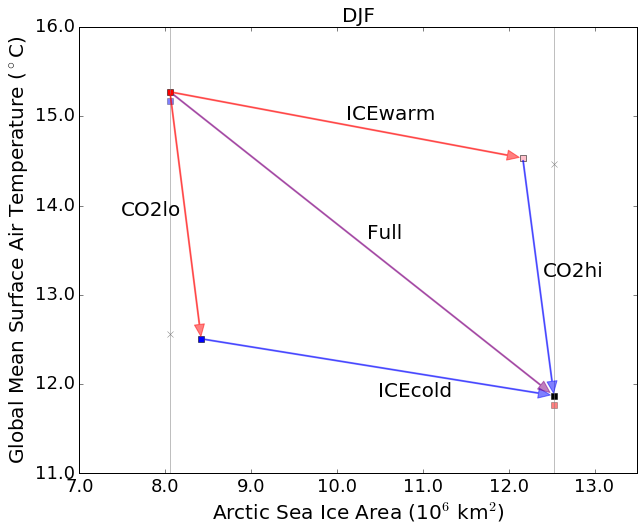

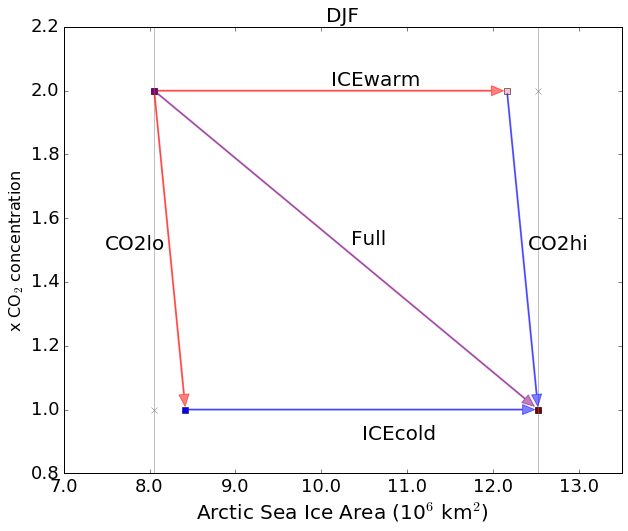

In [102]:
printtofile=True
fullann=False

gmtsdiffs,siadiffs = plot_sims_quad(nhsias,gms,toffsets,fullann=fullann,printtofile=printtofile)
ret = plot_sims_quad(nhsias,co2conc,toffsets,coconc=True,fullann=fullann,printtofile=printtofile)

print 'DIFFS'
print gmtsdiffs

### Plot 2: SAT, SLP maps

/usr/local/anaconda2-2.5.0/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


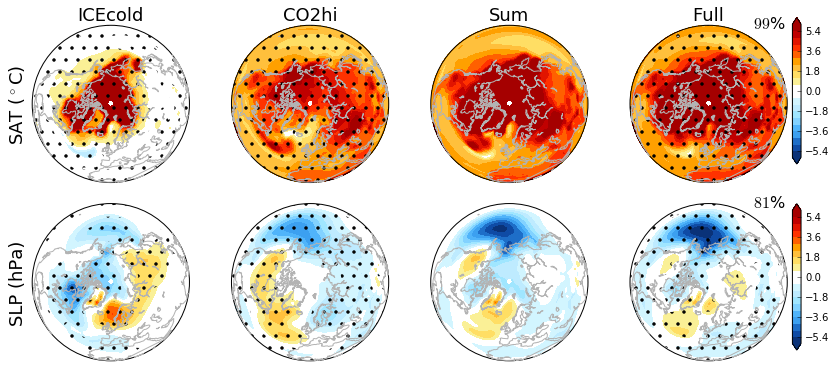

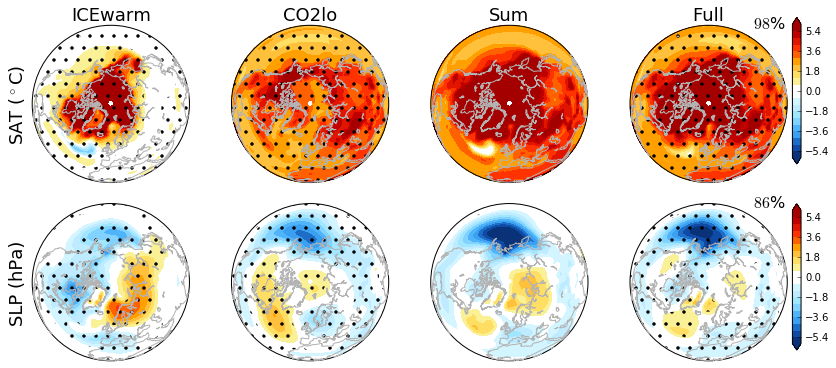

In [12]:
# Just plot SAT,SLP for paper.

fsz=18

printtofile=False
sigtype='hatch'
addsig=True

cplt=reload(cplt)

if sea=='ANN':
    cmin=-6; cmax=6 # just ice
    cmin2=-6; cmax2=6
    cmind=-2; cmaxd=2

    cminp=-2; cmaxp=2 # just ice
    cmin2p=-2; cmax2p=2
    cmindp=-1.5; cmaxdp=1.5

    cminw=-1; cmaxw=1
    cmindw=-.5; cmaxdw=.5
    
    cminpr=-.6; cmaxpr=.6
    cmindpr=-.6; cmaxdpr=.6
    
    cminz=-20; cmaxz=20
    cminz2=-20; cmaxz2=20
    cminzd=-10; cmaxzd=10
    
elif sea=='DJF':
    cmin=-6; cmax=6 # just ice
    cmin2=-6; cmax2=6
    cmind=-2; cmaxd=2

    cminp=-4; cmaxp=4 # just ice
    cmin2p=-6; cmax2p=6
    cmindp=-2; cmaxdp=2

    cminw=-2; cmaxw=2
    cmindw=-1; cmaxdw=1
    
    cminpr=-1; cmaxpr=1
    cmindpr=-1; cmaxdpr=1
elif sea in ('JJA','SON','MAM'): # SAME AS ANN
    cmin=-6; cmax=6 # just ice
    cmin2=-6; cmax2=6
    cmind=-2; cmaxd=2

    cminp=-3; cmaxp=3 # just ice
    cmin2p=-6; cmax2p=6
    cmindp=-1.5; cmaxdp=1.5

    cminw=-1; cmaxw=1
    cmindw=-.5; cmaxdw=.5
    
    cminpr=-.6; cmaxpr=.6
    cmindpr=-.6; cmaxdpr=.6
 

pparamstmp = {'cmin':cmin, 'cmax':cmax, 'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,'suppcb':True,'addsig':addsig,
            'sigtype':sigtype,'fsz':fsz}
pparamsslp = {'cmin':cminp, 'cmax':cmaxp, 'cmin2':cmin2p,'cmax2':cmax2p,
            'cmind':cmindp,'cmaxd':cmaxdp,'suppcb':True,'addsig':addsig,
            'sigtype':sigtype}


cby1=.55; cby2=0.08
cbx2=0.775; cbx3=0.955
cbw=0.01; cbh=0.37

fig,axs=plt.subplots(2,4,figsize=(12,5.5))

ph,ph2 = plot_nc_linearity_maps(nctmpdt,axs[0,:],lin='one',nolin=True,**pparamstmp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('SAT ($^\circ$C)',fontsize=fsz)

ph,ph2 = plot_nc_linearity_maps(ncslpdt,axs[1,:],lin='one',
                                nolin=True,suppttl=True,**pparamsslp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('SLP (hPa)',fontsize=fsz)

fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    fig.savefig('stslp_nolinpattcorr1_maps_' + sea + '_nh3_' + sigtype + suff +'.pdf',
                bbox_inches='tight')
    fig.savefig('stslp_nolinpattcorr1_maps_' + sea + '_nh3_' + sigtype+suff + '.png',
                bbox_inches='tight',dpi=400)
    fig.savefig('stslp_nolinpattcorr1_maps_' + sea + '_nh3_' + sigtype+ suff + '.jpg',
                bbox_inches='tight',dpi=400)
 

fig,axs=plt.subplots(2,4,figsize=(12,5.5))

ph,ph2 = plot_nc_linearity_maps(nctmpdt,axs[0,:],lin='two',nolin=True,**pparamstmp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('SAT ($^\circ$C)',fontsize=fsz)

ph,ph2 = plot_nc_linearity_maps(ncslpdt,axs[1,:],lin='two',
                                nolin=True,suppttl=True,**pparamsslp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('SLP (hPa)',fontsize=fsz)

fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    fig.savefig('stslp_nolinpattcorr2_maps_' + sea + '_nh3_' + sigtype + suff +'.pdf',
                bbox_inches='tight')
    fig.savefig('stslp_nolinpattcorr2_maps_' + sea + '_nh3_' + sigtype+suff + '.png',
                bbox_inches='tight',dpi=400)
    fig.savefig('stslp_nolinpattcorr2_maps_' + sea + '_nh3_' + sigtype+ suff + '.jpg',
                bbox_inches='tight',dpi=400)
 


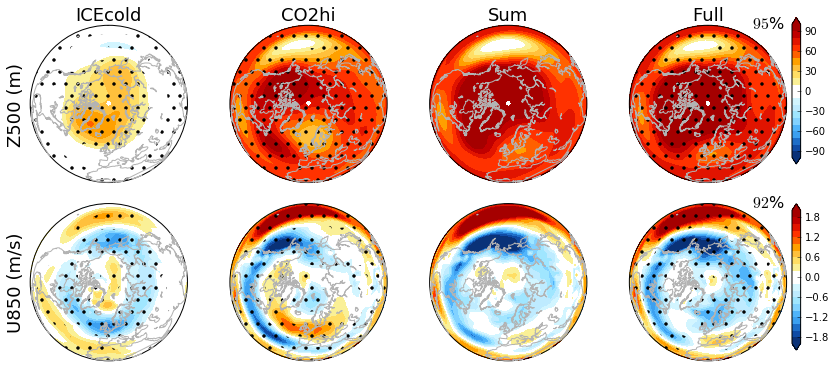

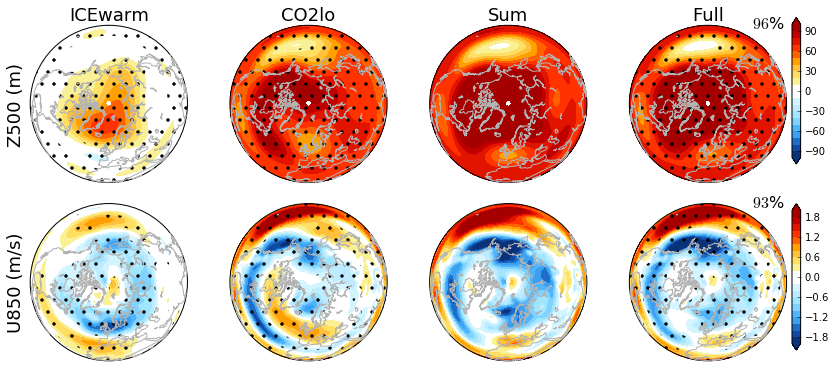

In [17]:
# test Z500 map

printtofile=False

cminz=-100; cmaxz=100
cminz2=-100; cmaxz2=100
cminzd=-10; cmaxzd=10

cminu8=-2; cmaxu8=2
cminu82=-2; cmaxu82=2
cminu8d=-1; cmaxu8d=1

pparamsz500 = {'cmin':cminz, 'cmax':cmaxz, 'cmin2':cminz2,'cmax2':cmaxz2,
            'cmind':cminzd,'cmaxd':cmaxzd,'suppcb':True,'addsig':addsig,
            'sigtype':sigtype,'fsz':fsz}
pparamsu850 = {'cmin':cminu8, 'cmax':cmaxu8, 'cmin2':cminu82,'cmax2':cmaxu82,
            'cmind':cminu8d,'cmaxd':cmaxu8d,'suppcb':True,'addsig':addsig,
            'sigtype':sigtype,'fsz':fsz}


cby1=.55; cby2=0.08
cbx2=0.775; cbx3=0.955
cbw=0.01; cbh=0.37


fig,axs=plt.subplots(2,4,figsize=(12,5.5))

ph,ph2 = plot_nc_linearity_maps(ncz500dt,axs[0,:],lin='one',nolin=True,**pparamsz500)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('Z500 (m)',fontsize=fsz)

ph,ph2 = plot_nc_linearity_maps(ncu850dt,axs[1,:],lin='one',
                                nolin=True,suppttl=True,**pparamsu850)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('U850 (m/s)',fontsize=fsz)

fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    fig.savefig('z500u850_nolinpattcorr1_maps_' + sea + '_nh3_' + sigtype + suff +'.pdf',
                bbox_inches='tight')
    fig.savefig('z500u850_nolinpattcorr1_maps_' + sea + '_nh3_' + sigtype+suff + '.png',
                bbox_inches='tight',dpi=400)
    fig.savefig('z500u850_nolinpattcorr1_maps_' + sea + '_nh3_' + sigtype+ suff + '.jpg',
                bbox_inches='tight',dpi=400)
 



fig,axs=plt.subplots(2,4,figsize=(12,5.5))

ph,ph2 = plot_nc_linearity_maps(ncz500dt,axs[0,:],lin='two',nolin=True,**pparamsz500)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('Z500 (m)',fontsize=fsz)

ph,ph2 = plot_nc_linearity_maps(ncu850dt,axs[1,:],lin='two',
                                nolin=True,suppttl=True,**pparamsu850)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('U850 (m/s)',fontsize=fsz)

fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    fig.savefig('z500u850_nolinpattcorr2_maps_' + sea + '_nh3_' + sigtype + suff +'.pdf',
                bbox_inches='tight')
    fig.savefig('z500u850_nolinpattcorr2_maps_' + sea + '_nh3_' + sigtype+suff + '.png',
                bbox_inches='tight',dpi=400)
    fig.savefig('z500u850_nolinpattcorr2_maps_' + sea + '_nh3_' + sigtype+ suff + '.jpg',
                bbox_inches='tight',dpi=400)
 


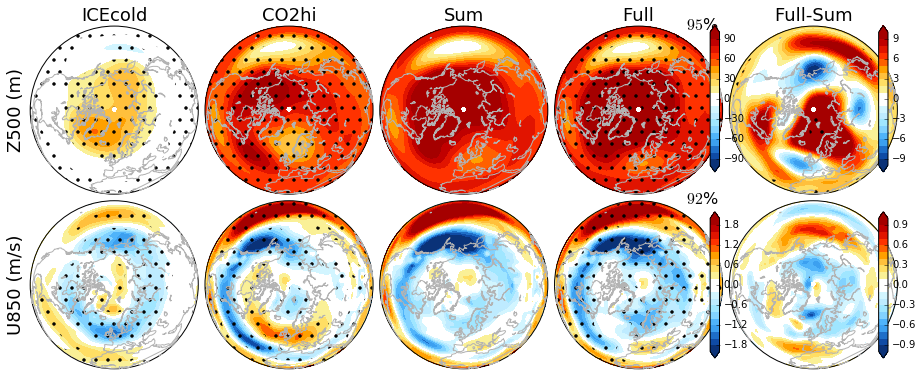

In [14]:
# INCLUDE NONLIN for reference
fig,axs=plt.subplots(2,5,figsize=(13,5.5))

ph,ph2, phd= plot_nc_linearity_maps(ncz500dt,axs[0,:],lin='one',nolin=False,**pparamsz500)
cplt.add_colorbar(fig,ph2,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,phd,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('Z500 (m)',fontsize=fsz)

ph,ph2,phd = plot_nc_linearity_maps(ncu850dt,axs[1,:],lin='one',
                                nolin=False,suppttl=True,**pparamsu850)
cplt.add_colorbar(fig,ph2,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,phd,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('U850 (m/s)',fontsize=fsz)

fig.tight_layout(pad=2.1,w_pad=.2)

### Plot 3: monthly measure of linearity

northof 60
tmp
slp
u850
z500
tmp
slp
u850
z500
----
tmp
slp
u850
z500


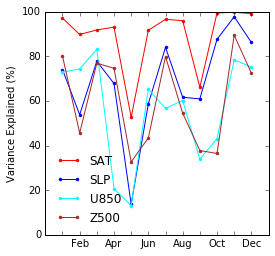

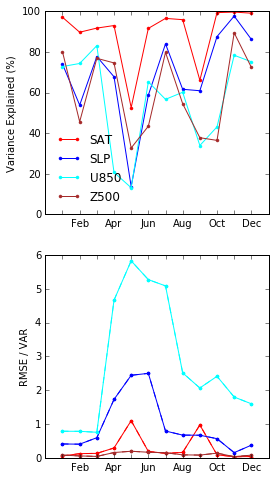

In [95]:
printtofile=True
print 'northof ' + str(nof)

mos=range(1,13)
clrdt = {'tmp':'r', 'slp':'b', 'z500':'brown','u850':'cyan','tZM':'orange','uZM':'black'}

# JUST VAR EXPLAINED
fig,ax = plt.subplots(1,1,figsize=(4,4))

for mkey in morvals1.keys():
    if 'ZM' in mkey:
        pass
    else:
        print mkey
        val = 100*morvals1[mkey]**2
        ax.plot(mos,val,color=clrdt[mkey],marker='.')
        #val = 100*morvals2[mkey]**2
        #ax.plot(mos,val,color=clrdt[mkey],linestyle='--',marker='s')
    
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
#ax.set_ylim((30,100))
ax.set_ylim((0,100))
ax.set_ylabel('Variance Explained (%)')
ax.legend(('SAT',
           'SLP',
           'U850','Z500'),frameon=False,loc='best')
if printtofile:
    fig.savefig('Fig3_stslpu850z500_PattCorr_nof' + str(nof) + '_monthly.pdf',
                bbox_inches='tight')
    fig.savefig('Fig3_stslpu850z500_PattCorr_nof' + str(nof) + '_monthly.jpg',
                bbox_inches='tight',dpi=300)


# BOTH VAR EXPLAINED AND RMSE
#fig,axs = plt.subplots(1,2,figsize=(8,3))
fig,axs = plt.subplots(2,1,figsize=(4,8))

ax=axs[0]
for mkey in morvals1.keys():
    if 'ZM' in mkey:
        pass
    else:
        print mkey
        val = 100*morvals1[mkey]**2
        ax.plot(mos,val,color=clrdt[mkey],marker='.')
        #val = 100*morvals2[mkey]**2
        #ax.plot(mos,val,color=clrdt[mkey],linestyle='--',marker='s')
    
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
#ax.set_ylim((30,100))
ax.set_ylim((0,100))
ax.set_ylabel('Variance Explained (%)')
ax.legend(('SAT',
           'SLP',
           'U850','Z500'),frameon=False,loc='best')

print '----'
# Need to normalize by the mean anomaly @@@@
ax=axs[1]
for mkey in morvals1.keys():
    
    if 'ZM' in mkey:
        pass
    #elif mkey=='z500': 
    #    pass
    else:
        print mkey
        val = mormse1[mkey]
        ax.plot(mos,val,color=clrdt[mkey],marker='.')
        val = mormse2[mkey]
        ax.plot(mos,val,color=clrdt[mkey],linestyle='--',marker='.')
    
# lin one and two RMSE the same @@

ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
#ax.set_ylim((50,100))
ax.set_ylabel('RMSE / VAR')

if printtofile:
    fig.savefig('Fig3_stslpu850z500_PattCorr_RMSE_nof' + str(nof) + '_monthly.pdf'
                ,bbox_inches='tight')
    fig.savefig('Fig3_stslpu850z500_PattCorr_RMSE_nof' + str(nof) + '_monthly.jpg',
                bbox_inches='tight',dpi=300)

### Figure 4: circulation response to sea ice and CO2

/HOME/rkm/pyscripts/classes/cccmaplots.py:488: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if conts != None:


[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[-3  2  7 12 17 22 27]
[-3  2  7 12 17 22 27]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[-3  2  7 12 17 22 27]
[-3  2  7 12 17 22 27]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]


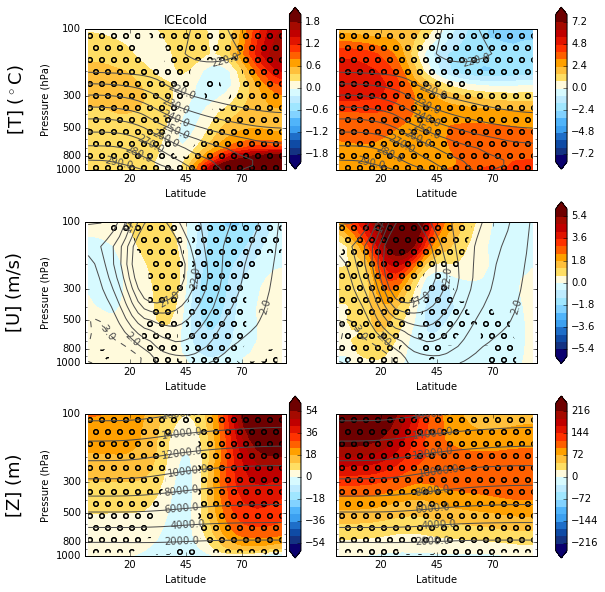

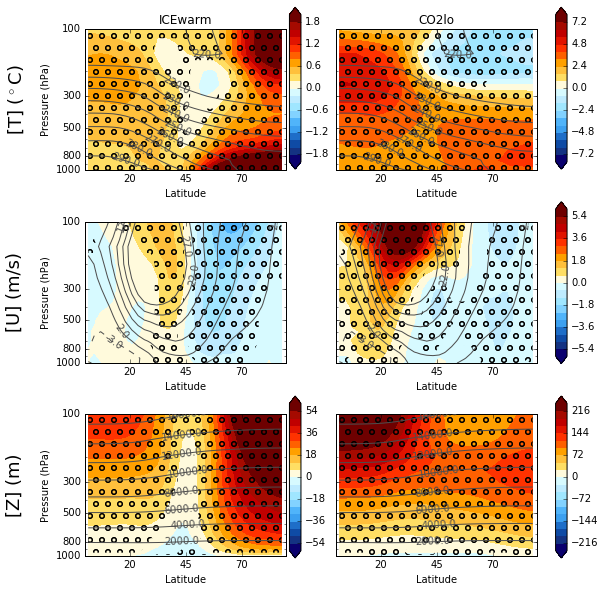

In [16]:
printtofile=True
sigtype='hatch'

addclimcont=True

levlim=100
ptype='nh'; latlim=0 # nh plot


# T
cmin=-1; cmax=1; cmap='blue2red_20' # for the ice comparison
cmin2=-8; cmax2=8 
cmind=-.5; cmaxd=.5
ctlcontst=np.arange(220,300,10)
if sea=='DJF':
    cmin=-2; cmax=2;
    cmind=-1; cmaxd=1
    
# Z
cminz=-25; cmaxz=25; cmap='blue2red_20' # for the ice comparison
cmin2z=-200; cmax2z=200
cmindz=-15; cmaxdz=15
ctlcontsz=np.arange(2000,20000,2000)
if sea=='DJF':
    cminz=-60; cmaxz=60;
    cmin2z=-240; cmax2z=240

# U
cminw=-1; cmaxw=1 # for the ice comparison
cmin2w=-6; cmax2w=6 
cmindw=-.5; cmaxdw=.5
ctlcontsw=np.arange(-3,30,5)
if sea=='DJF':
    cminw=-6; cmaxw=6;
    cmindw=-1; cmaxdw=1

    
pparamsT = {'cmin':cmin, 'cmax':cmax, 'cmap':cmap,'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':True,'nofull':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontst}

pparamsZ = {'cmin':cminz, 'cmax':cmaxz, 'cmap':cmap,'cmin2':cmin2z,'cmax2':cmax2z,
            'cmind':cmindz,'cmaxd':cmaxdz,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':True,'nofull':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsz}

pparamsU = {'cmin':cminw, 'cmax':cmaxw, 'cmap':cmap,'cmin2':cmin2w,'cmax2':cmax2w,
            'cmind':cmindw,'cmaxd':cmaxdw,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':True,'nofull':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsw}


cby1=.7; cby2=0.4; cby3=0.1
cbx1=0.5; cbx2=0.775; cbx3=0.962
cbw=0.02; cbh=0.25

fig,axs=plt.subplots(3,2,figsize=(8,9))

ph,ph2 = plot_nc_linearity_maps(nctZMdt,axs[0,:],lin='one',nolin=True,**pparamsT)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].annotate('[T] ($^\circ$C)',xy=(0.01,0.865),xycoords='figure fraction',rotation=90,fontsize=fsz)

ph,ph2 = plot_nc_linearity_maps(ncuZMdt,axs[1,:],lin='one',suppttl=True,nolin=True,**pparamsU)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
#cplt.add_colorbar(fig,ph,pos=[cbx1,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].annotate('[U] (m/s)',xy=(0.01,0.55),xycoords='figure fraction',rotation=90,fontsize=fsz)

ph,ph2 = plot_nc_linearity_maps(nczZMdt,axs[2,:],lin='one',suppttl=True,nolin=True,**pparamsZ)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby3,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].annotate('[Z] (m)',xy=(0.01,0.21),xycoords='figure fraction',rotation=90,fontsize=fsz)

fig.tight_layout(pad=4,w_pad=5,h_pad=2)

if printtofile:
    if addclimcont: prstr='cont'
    else: prstr=''
        
    fig.savefig('TUZ_iceco2_vertlin1_' + sea + '_'  +sigtype+ ptype + prstr + suff + '.pdf', 
                bbox_inches='tight')
    fig.savefig('TUZ_iceco2_vertlin1_' + sea + '_'+ sigtype+ptype + prstr + suff + '.png',dpi=300, 
                bbox_inches='tight')
    fig.savefig('TUZ_iceco2_vertlin1_' + sea + '_'  + sigtype+ptype + prstr + suff + '.jpg',dpi=300, 
                bbox_inches='tight')

    
fig,axs=plt.subplots(3,2,figsize=(8,9))

ph,ph2 = plot_nc_linearity_maps(nctZMdt,axs[0,:],lin='two',nolin=True,**pparamsT)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].annotate('[T] ($^\circ$C)',xy=(0.01,0.865),xycoords='figure fraction',rotation=90,fontsize=fsz)

ph,ph2 = plot_nc_linearity_maps(ncuZMdt,axs[1,:],lin='two',suppttl=True,nolin=True,**pparamsU)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
#cplt.add_colorbar(fig,ph,pos=[cbx1,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].annotate('[U] (m/s)',xy=(0.01,0.55),xycoords='figure fraction',rotation=90,fontsize=fsz)

ph,ph2 = plot_nc_linearity_maps(nczZMdt,axs[2,:],lin='two',suppttl=True,nolin=True,**pparamsZ)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby3,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].annotate('[Z] (m)',xy=(0.01,0.21),xycoords='figure fraction',rotation=90,fontsize=fsz)

fig.tight_layout(pad=4,w_pad=5,h_pad=2)

if printtofile:
    if addclimcont: prstr='cont'
    else: prstr=''
        
    fig.savefig('TUZ_iceco2_vertlin2_' + sea + '_'  +sigtype+ ptype + prstr + suff + '.pdf', 
                bbox_inches='tight')
    fig.savefig('TUZ_iceco2_vertlin2_' + sea + '_'+ sigtype+ptype + prstr + suff + '.png',dpi=300, 
                bbox_inches='tight')
    fig.savefig('TUZ_iceco2_vertlin2_' + sea + '_'  + sigtype+ptype + prstr + suff + '.jpg',dpi=300, 
                bbox_inches='tight')


### graphical summary of PHT, possible last figure

In [8]:
import energybalance_utils as ebu

lrlx = reload(lrlx)

sea='ANN'

fluxkeys = ('nettoa','netsfc')
timepers, timesels =lrlx.get_timeinfo(last=last) 
timepers['piControl'] = '2015-3010'
timepers['gregory_2xco2'] = '2451-2550'

# get global lat for PHT vars
glat,glon = lrlx.load_nclatlon('st',last='last100',
                               includeyr1=includeyr1,verb=True)

matdir = '/HOME/rkm/pyscripts/pymatfiles/'
#npydir = '/HOME/rkm/pyscripts/pynpyfiles/'
npydir = '/Users/kelly/pyscripts/pynpyfiles/'
ttype='timeseries'


# First load the data from .mat files
allflux={}; allfluxtm={}
totpht={}; ocnpht={}; atmpht={}
totphtadjtm={}; totphtnhadjtm={}; totphtshadjtm={}; totphthemadjtm={}; tot60adjtm={}

totphttm={}; ocnphttm={}; atmphttm={}
netimbal={}; nhnetimbal={}; shnetimbal={}; adjnetimbal={}
nhimbaltile={}; nhadjnetimbal={}; shimbaltile={}; shadjnetimbal={}
hemimbaltile={}; hemadjnetimbal={}
n60netimbal={}; s60netimbal={}; imbal60tile={}; adj60netimbal={}

gweights = np.cos(np.deg2rad(glat))

# For each simulation, load the npy file with nettoa, netsfc data
for casename in casenames+('piControl','gregory_2xco2'):
    timeper = timepers[casename]
    
    fluxdt={}; fluxtmdt={}
        
    for fkey in fluxkeys:
        matname = npydir + 'PHT/' + fkey + '_' + casename + '_' + \
               sea + '_' + ttype + timeper +'.npy'
        print 'load ' + matname
        #tmp = sio.loadmat(matname, squeeze_me=True)
        #print tmp
        print casename,fkey
        #tmp = sio.loadmat(matname, squeeze_me=True)[fkey]
        tmp = np.load(matname)
        print tmp.shape
        fluxdt[fkey] = tmp # keep time dim
        fluxtmdt[fkey]  = tmp.mean(axis=0) # time mean
        
        # If loading nettoa, test out some methods of adjusting for residual non-zero imbalance
        if fkey=='nettoa':
            print '@@@@ ' + str(fluxtmdt[fkey].shape)
            netimbal[casename] = np.average(fluxtmdt[fkey],weights=gweights)
            nhnetimbal[casename] = np.average(fluxtmdt[fkey][glat>0],weights=np.cos(np.deg2rad(glat[glat>0])))
            shnetimbal[casename] = np.average(fluxtmdt[fkey][glat<0],weights=np.cos(np.deg2rad(glat[glat<0])))
            
            adjnetimbal[casename] = np.average(fluxtmdt[fkey]-netimbal[casename],weights=np.cos(np.deg2rad(glat)))
            
            # adjust just the NH           
            ntmp = np.tile(nhnetimbal[casename],fluxtmdt[fkey].shape)
            ntmp[glat<0] = 0
            nhimbaltile[casename] = ntmp
            nhadjnetimbal[casename] = np.average(fluxtmdt[fkey]-nhimbaltile[casename],
                                                 weights=np.cos(np.deg2rad(glat)))
            
            # adjust just the SH           
            stmp = np.tile(shnetimbal[casename],fluxtmdt[fkey].shape)
            stmp[glat>0] = 0
            shimbaltile[casename] = stmp
            shadjnetimbal[casename] = np.average(fluxtmdt[fkey]-shimbaltile[casename],
                                                 weights=np.cos(np.deg2rad(glat)))
            
            # Hemisphere's adjusted separately
            htmp = np.tile(nhnetimbal[casename],fluxtmdt[fkey].shape) # start with NH imbalance everywhere
            htmp[glat<0] = stmp[glat<0] # fill in SH imbalance in SH only
            hemimbaltile[casename] = htmp
            hemadjnetimbal[casename] = np.average(fluxtmdt[fkey]-hemimbaltile[casename],
                                                  weights=np.cos(np.deg2rad(glat)))
            
            # North of 60 
            n60netimbal[casename] = np.average(fluxtmdt[fkey][glat>60],weights=np.cos(np.deg2rad(glat[glat>60])))
            s60netimbal[casename] = np.average(fluxtmdt[fkey][glat<=60],weights=np.cos(np.deg2rad(glat[glat<=60])))
            
            tmp60n = np.tile(n60netimbal[casename],fluxtmdt[fkey].shape) 
            tmp60 = np.tile(s60netimbal[casename],fluxtmdt[fkey].shape) # start with south of 60N imbal everywhere
            tmp60[glat>60] = tmp60n[glat>60] # add north of 60 avg in that region
            imbal60tile[casename] = tmp60
            adj60netimbal[casename] = np.average(fluxtmdt[fkey]-imbal60tile[casename],
                                                  weights=np.cos(np.deg2rad(glat)))
            
        elif fkey=='netsfc' and (casename=='piControl' or casename=='gregory_2xco2'):
            # need to multiply by -1
            fluxdt[fkey] = -1*tmp # keep time dim
            fluxtmdt[fkey]  = -1*tmp.mean(axis=0) # time mean

    allflux[casename] = fluxdt
    allfluxtm[casename] = fluxtmdt

    totpht[casename],ocnpht[casename],atmpht[casename] =\
        ebu.calc_inferred_pht_components(fluxdt['nettoa'],fluxdt['netsfc'],glat)
    totphttm[casename],ocnphttm[casename],atmphttm[casename] =\
        ebu.calc_inferred_pht_components(fluxtmdt['nettoa'],fluxtmdt['netsfc'],glat)
        
    totphtadjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-netimbal[casename],glat)
    totphtnhadjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-nhimbaltile[casename],glat)
    totphtshadjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-shimbaltile[casename],glat)
    totphthemadjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-hemimbaltile[casename],glat)
    tot60adjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-imbal60tile[casename],glat)

Darwin CMIP
/Volumes/KellyDataDisk1/work/DATA/CanESM2/preipreiice/ts/preipreiice_st_3022-3121_ts.nc
lat.shape (64,)
lon.shape (129,)
load /Users/kelly/pyscripts/pynpyfiles/PHT/nettoa_preipreiice_ANN_timeseries2922-3121.npy
preipreiice nettoa
(200, 64)
@@@@ (64,)
load /Users/kelly/pyscripts/pynpyfiles/PHT/netsfc_preipreiice_ANN_timeseries2922-3121.npy
preipreiice netsfc
(200, 64)
load /Users/kelly/pyscripts/pynpyfiles/PHT/nettoa_prei2xco2iceb_ANN_timeseries3022-3221.npy
prei2xco2iceb nettoa
(200, 64)
@@@@ (64,)
load /Users/kelly/pyscripts/pynpyfiles/PHT/netsfc_prei2xco2iceb_ANN_timeseries3022-3221.npy
prei2xco2iceb netsfc
(200, 64)
load /Users/kelly/pyscripts/pynpyfiles/PHT/nettoa_pi2xco2ipulse_ANN_timeseries2921-3021.npy
pi2xco2ipulse nettoa
(100, 64)
@@@@ (64,)
load /Users/kelly/pyscripts/pynpyfiles/PHT/netsfc_pi2xco2ipulse_ANN_timeseries2921-3021.npy
pi2xco2ipulse netsfc
(100, 64)
load /Users/kelly/pyscripts/pynpyfiles/PHT/nettoa_2xco22xco2ice_ANN_timeseries2452-2651.npy
2xco22xco2ic

--non-zero at pole
           2xco22xco2ice  2xco2preiice  gregory_2xco2  pi2xco2ipulse  \
87.863799   3.218082e+14  5.502703e+14   2.822497e+14   4.438277e+13   

              piControl  prei2xco2iceb   preipreiice  
87.863799  1.128406e+14   1.225586e+13  1.681154e+14  
--adjusted: zero at pole
           2xco22xco2ice  2xco2preiice  gregory_2xco2  pi2xco2ipulse  \
87.863799   5.569896e+13  5.536704e+13   5.591379e+13   5.457316e+13   

              piControl  prei2xco2iceb   preipreiice  
87.863799  5.436322e+13   5.453136e+13  5.412694e+13  
--NH adjusted: zero at pole
           2xco22xco2ice  2xco2preiice  gregory_2xco2  pi2xco2ipulse  \
87.863799   9.473858e+13  1.979124e+14   9.933377e+13  -4.751450e+13   

              piControl  prei2xco2iceb   preipreiice  
87.863799 -3.403083e+11  -6.142886e+13 -3.302936e+12  
--SH adjusted: zero at pole
           2xco22xco2ice  2xco2preiice  gregory_2xco2  pi2xco2ipulse  \
87.863799   2.827686e+14  4.077249e+14   2.388298e+14   1.46470

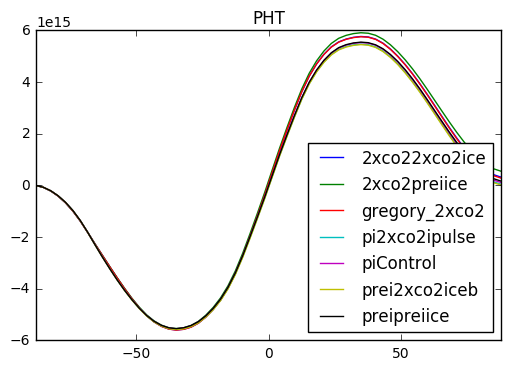

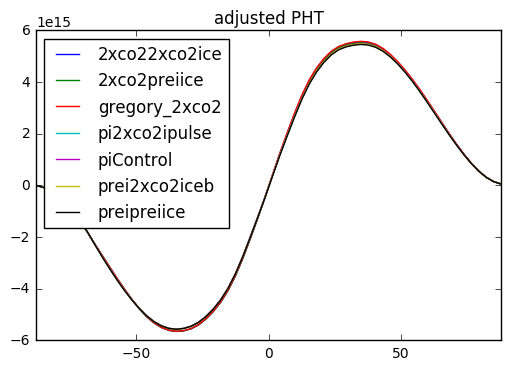

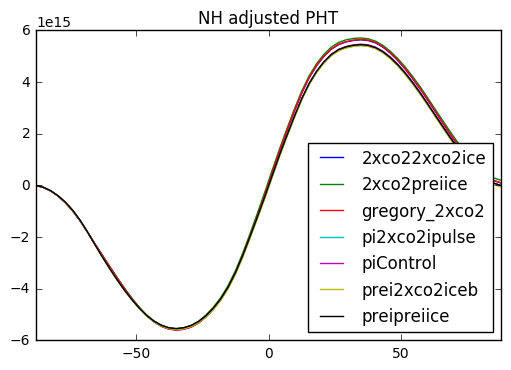

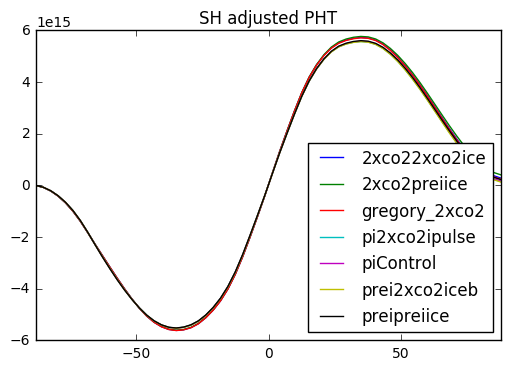

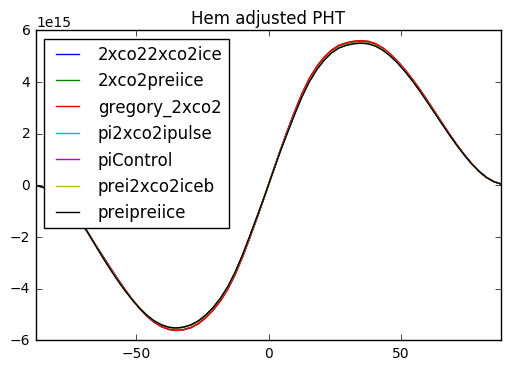

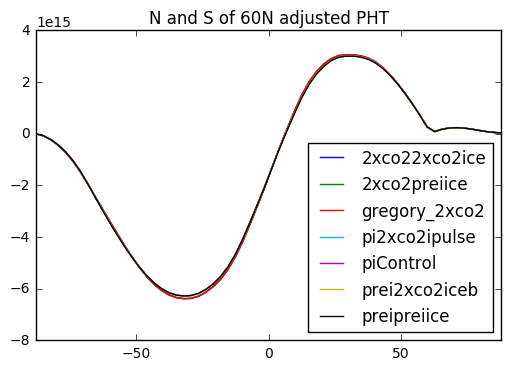

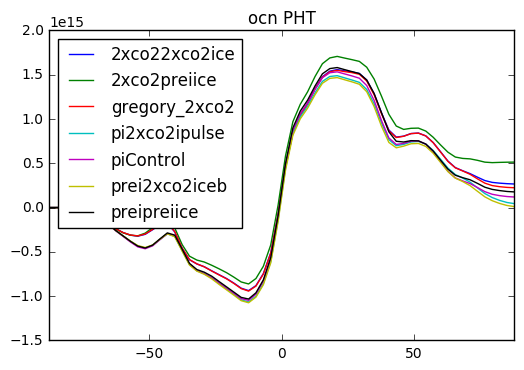

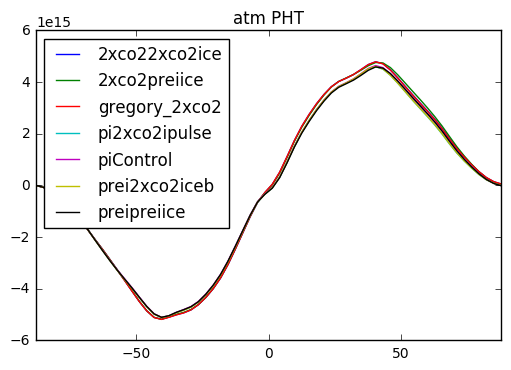

In [9]:
# Plot poleward heat transport
totdf = pd.DataFrame(totphttm,index=glat)
totdf.plot(title='PHT')

totadjdf = pd.DataFrame(totphtadjtm,index=glat)
totadjdf.plot(title='adjusted PHT')

# just the NH is adjusted
totnhadjdf = pd.DataFrame(totphtnhadjtm,index=glat)
totnhadjdf.plot(title='NH adjusted PHT')

# just the SH is adjusted
totshadjdf = pd.DataFrame(totphtshadjtm,index=glat)
totshadjdf.plot(title='SH adjusted PHT')

# both Hems separately adjusted
tothemadjdf = pd.DataFrame(totphthemadjtm,index=glat)
tothemadjdf.plot(title='Hem adjusted PHT')

# N and S of 60N separately adjusted
tot60adjdf = pd.DataFrame(tot60adjtm,index=glat)
tot60adjdf.plot(title='N and S of 60N adjusted PHT')



#print totdf['piControl'][totdf.index>=87.]
print '--non-zero at pole'
print totdf[totdf.index>=87.]
print '--adjusted: zero at pole'
print totadjdf[totadjdf.index>=87.]
print '--NH adjusted: zero at pole'
print totnhadjdf[totnhadjdf.index>=87.]
print '--SH adjusted: zero at pole'
print totshadjdf[totshadjdf.index>=87.]
print '--Hem adjusted: zero at pole'
print tothemadjdf[tothemadjdf.index>=87.]

print '-------------------------------'

ocndf = pd.DataFrame(ocnphttm,index=glat)
ocndf.plot(title='ocn PHT')
atmdf = pd.DataFrame(atmphttm,index=glat)
atmdf.plot(title='atm PHT')

#print atmdf
# @@@  remove residual HT at pole? see how changes shape...

print pd.Series(netimbal)
print '--adjusted net imbal--'
print pd.Series(adjnetimbal)

print '--NH'
print pd.Series(nhnetimbal)
print '--NH adjusted net imbal--'
print pd.Series(nhadjnetimbal)

print '--SH'
print pd.Series(shnetimbal)
print '--SH adjusted net imbal--'
print pd.Series(shadjnetimbal)

print '----------------'
print '--Hem adjusted net imbal--'
print pd.Series(hemadjnetimbal)


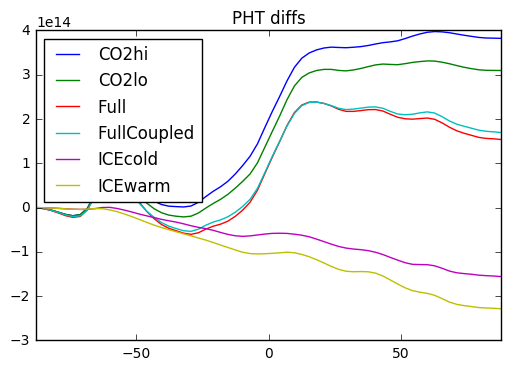

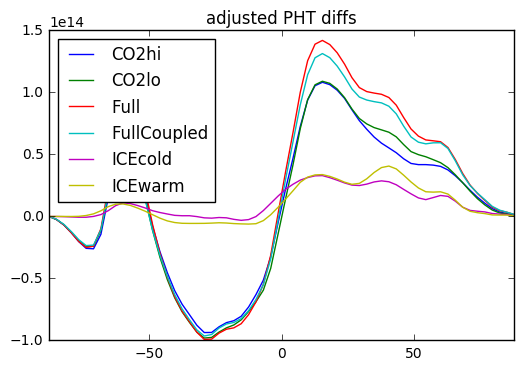

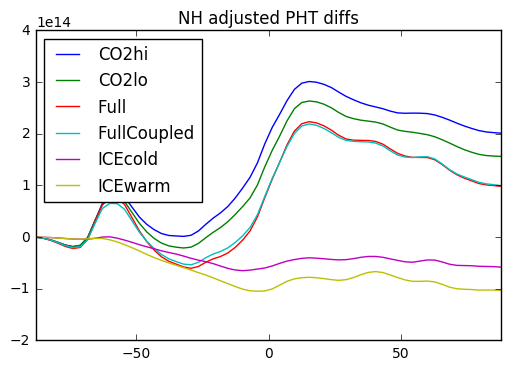

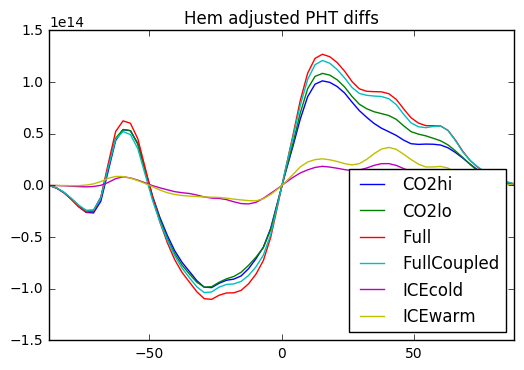

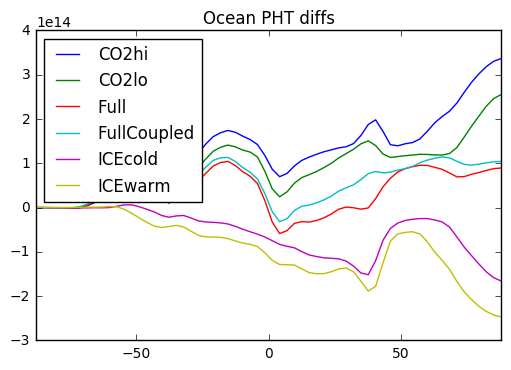

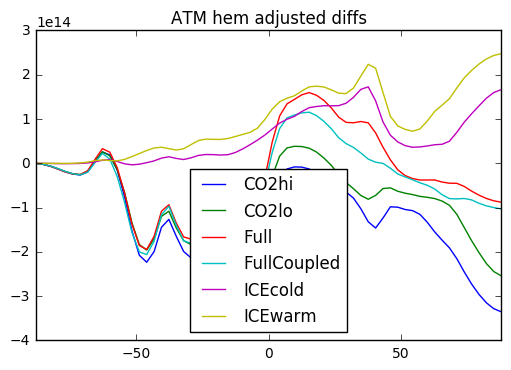

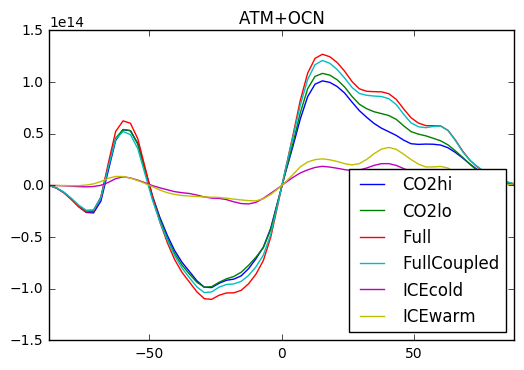

In [10]:

# Plot differences
phtdiff={}
phtdiff['ICEcold'] = totdf['prei2xco2iceb']-totdf['preipreiice']
phtdiff['ICEwarm'] = totdf['2xco22xco2ice']-totdf['2xco2preiice']
phtdiff['CO2hi'] = totdf['2xco2preiice']-totdf['preipreiice']
phtdiff['CO2lo'] = totdf['2xco22xco2ice']-totdf['prei2xco2iceb']
phtdiff['Full'] = totdf['2xco22xco2ice']-totdf['preipreiice']
phtdiff['FullCoupled'] = totdf['gregory_2xco2']-totdf['piControl']

pd.DataFrame(phtdiff).plot(title='PHT diffs')


phtadjdiff={}
phtadjdiff['ICEcold'] = totadjdf['prei2xco2iceb']-totadjdf['preipreiice']
phtadjdiff['ICEwarm'] = totadjdf['2xco22xco2ice']-totadjdf['2xco2preiice']
phtadjdiff['CO2hi'] = totadjdf['2xco2preiice']-totadjdf['preipreiice']
phtadjdiff['CO2lo'] = totadjdf['2xco22xco2ice']-totadjdf['prei2xco2iceb']
phtadjdiff['Full'] = totadjdf['2xco22xco2ice']-totadjdf['preipreiice']
phtadjdiff['FullCoupled'] = totadjdf['gregory_2xco2']-totadjdf['piControl']

pd.DataFrame(phtadjdiff).plot(title='adjusted PHT diffs')


phtnhadjdiff={}
phtnhadjdiff['ICEcold'] = totnhadjdf['prei2xco2iceb']-totnhadjdf['preipreiice']
phtnhadjdiff['ICEwarm'] = totnhadjdf['2xco22xco2ice']-totnhadjdf['2xco2preiice']
phtnhadjdiff['CO2hi'] = totnhadjdf['2xco2preiice']-totnhadjdf['preipreiice']
phtnhadjdiff['CO2lo'] = totnhadjdf['2xco22xco2ice']-totnhadjdf['prei2xco2iceb']
phtnhadjdiff['Full'] = totnhadjdf['2xco22xco2ice']-totnhadjdf['preipreiice']
phtnhadjdiff['FullCoupled'] = totnhadjdf['gregory_2xco2']-totnhadjdf['piControl']

pd.DataFrame(phtnhadjdiff).plot(title='NH adjusted PHT diffs')


phthemadjdiff={}
phthemadjdiff['ICEcold'] = tothemadjdf['prei2xco2iceb']-tothemadjdf['preipreiice']
phthemadjdiff['ICEwarm'] = tothemadjdf['2xco22xco2ice']-tothemadjdf['2xco2preiice']
phthemadjdiff['CO2hi'] = tothemadjdf['2xco2preiice']-tothemadjdf['preipreiice']
phthemadjdiff['CO2lo'] = tothemadjdf['2xco22xco2ice']-tothemadjdf['prei2xco2iceb']
phthemadjdiff['Full'] = tothemadjdf['2xco22xco2ice']-tothemadjdf['preipreiice']
phthemadjdiff['FullCoupled'] = tothemadjdf['gregory_2xco2']-tothemadjdf['piControl']

phthemadjdiffdf = pd.DataFrame(phthemadjdiff)
phthemadjdiffdf.plot(title='Hem adjusted PHT diffs')

# #### Now do ocn and atm
ocndiff={}
ocndiff['ICEcold'] = ocndf['prei2xco2iceb']-ocndf['preipreiice']
ocndiff['ICEwarm'] = ocndf['2xco22xco2ice']-ocndf['2xco2preiice']
ocndiff['CO2hi'] = ocndf['2xco2preiice']-ocndf['preipreiice']
ocndiff['CO2lo'] = ocndf['2xco22xco2ice']-ocndf['prei2xco2iceb']
ocndiff['Full'] = ocndf['2xco22xco2ice']-ocndf['preipreiice']
ocndiff['FullCoupled'] = ocndf['gregory_2xco2']-ocndf['piControl']

ocndiffdf = pd.DataFrame(ocndiff)
ocndiffdf.plot(title='Ocean PHT diffs')

atmhemadjdiffdf = phthemadjdiffdf - ocndiffdf
atmhemadjdiffdf.plot(title='ATM hem adjusted diffs')

totsumdf = atmhemadjdiffdf+ocndiffdf
totsumdf.plot(title='ATM+OCN')

In [15]:
# Plot the raw net fluxes

#print allfluxtm


allfluxtmdf = pd.DataFrame(allfluxtm)
print allfluxtmdf.columns
print allfluxtmdf.index
allfluxtmdf.info()

multidx = [casenames*2, fluxkeys*5]
tuplesmult = list(zip(*multidx))
print tuplesmult

mindex = pd.MultiIndex.from_tuples(tuplesmult, names=['case', 'flux'])

Index([u'2xco22xco2ice', u'2xco2preiice', u'pi2xco2ipulse', u'piControl',
       u'prei2xco2iceb', u'preipreiice'],
      dtype='object')
Index([u'netsfc', u'nettoa'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, netsfc to nettoa
Data columns (total 6 columns):
2xco22xco2ice    2 non-null object
2xco2preiice     2 non-null object
pi2xco2ipulse    2 non-null object
piControl        2 non-null object
prei2xco2iceb    2 non-null object
preipreiice      2 non-null object
dtypes: object(6)
memory usage: 112.0+ bytes
[('preipreiice', 'nettoa'), ('prei2xco2iceb', 'netsfc'), ('pi2xco2ipulse', 'nettoa'), ('2xco22xco2ice', 'netsfc'), ('2xco2preiice', 'nettoa'), ('preipreiice', 'netsfc'), ('prei2xco2iceb', 'nettoa'), ('pi2xco2ipulse', 'netsfc'), ('2xco22xco2ice', 'nettoa'), ('2xco2preiice', 'netsfc')]


In [16]:
# this way is easier ("from_product")
multidx = [casenames, fluxkeys]
tuples = list(zip(*multidx))
mindex = pd.MultiIndex.from_product(tuples, names=['case', 'flux'])

print mindex

# @@@ Now, how to connect my actual data with the MultiIndex?
# http://pandas.pydata.org/pandas-docs/stable/advanced.html

allfluxtmdf2 = pd.DataFrame(allfluxtm,index=glat,columns=mindex)

allfluxtmdf2.info()

allfluxtmdf2.describe()

MultiIndex(levels=[[u'nettoa', u'preipreiice'], [u'netsfc', u'prei2xco2iceb']],
           labels=[[1, 1, 0, 0], [1, 0, 1, 0]],
           names=[u'case', u'flux'])
<class 'pandas.core.frame.DataFrame'>
Float64Index: 64 entries, -87.8637987364 to 87.8637987364
Data columns (total 4 columns):
(preipreiice, prei2xco2iceb)    0 non-null object
(preipreiice, netsfc)           0 non-null object
(nettoa, prei2xco2iceb)         0 non-null object
(nettoa, netsfc)                0 non-null object
dtypes: object(4)
memory usage: 2.5+ KB


case     preipreiice               nettoa       
flux   prei2xco2iceb netsfc prei2xco2iceb netsfc
count              0      0             0      0
unique             0      0             0      0

In [8]:
import xarray as xr



#foo = xr.DataArray(data, coords=[glat], dims=['lat'])

Index([u'2xco22xco2ice', u'2xco2preiice', u'pi2xco2ipulse', u'piControl',
       u'prei2xco2iceb', u'preipreiice'],
      dtype='object')
SFC
<class 'pandas.core.frame.DataFrame'>
Float64Index: 64 entries, -87.8637987364 to 87.8637987364
Data columns (total 6 columns):
2xco22xco2ice    64 non-null float64
2xco2preiice     64 non-null float64
pi2xco2ipulse    64 non-null float64
piControl        64 non-null float64
prei2xco2iceb    64 non-null float64
preipreiice      64 non-null float64
dtypes: float64(6)
memory usage: 3.5 KB
None
TOA
<class 'pandas.core.frame.DataFrame'>
Float64Index: 64 entries, -87.8637987364 to 87.8637987364
Data columns (total 6 columns):
2xco22xco2ice    64 non-null float64
2xco2preiice     64 non-null float64
pi2xco2ipulse    64 non-null float64
piControl        64 non-null float64
prei2xco2iceb    64 non-null float64
preipreiice      64 non-null float64
dtypes: float64(6)
memory usage: 3.5 KB
None


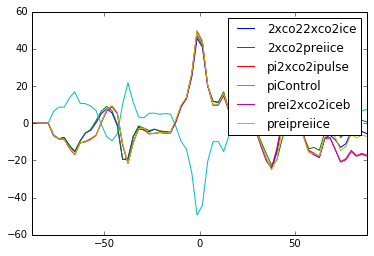

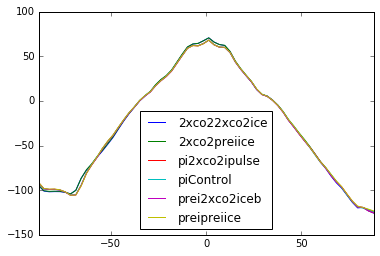

In [17]:
print allfluxtmdf.keys()
sfcdf = pd.DataFrame(allfluxtmdf.loc['netsfc'])
toadf = pd.DataFrame(allfluxtmdf.loc['nettoa'])

# np.array(np.squeeze(sfcdf.values).tolist()).T gives 64 x 5 matrix
sfcdata = np.array(np.squeeze(sfcdf.values).tolist()).T
sfcdf2 = pd.DataFrame(np.array(np.squeeze(sfcdf.values).tolist()).T,
                      columns=allfluxtmdf.keys(),index=glat)
toadata = np.array(np.squeeze(toadf.values).tolist()).T
toadf2 = pd.DataFrame(np.array(np.squeeze(toadf.values).tolist()).T,
                      columns=allfluxtmdf.keys(),index=glat)

print 'SFC'
print sfcdf2.info()
print 'TOA'
print toadf2.info()

sfcdf2.plot()
toadf2.plot()
#sfcdf2['2xco22xco2ice'].plot()

In [25]:
sfcxr = xr.DataArray(sfcdf2, coords=[glat,sfcdf2.columns], dims=['lat','casename'])
toaxr = xr.DataArray(toadf2, coords=[glat,toadf2.columns], dims=['lat','casename'])

flxds = xr.Dataset({'netsfc':sfcxr, 'nettoa':toaxr})

In [37]:
print flxds

#flxds.netsfc.isel(casename='preipreiice').plot()
print flxds.netsfc.loc['preipreiice']

<xarray.Dataset>
Dimensions:   (casename: 5, lat: 64)
Coordinates:
  * lat       (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * casename  (casename) object '2xco22xco2ice' '2xco2preiice' ...
Data variables:
    nettoa    (lat, casename) float64 -94.98 -94.55 -91.76 -91.86 -91.54 ...
    netsfc    (lat, casename) float64 -0.01204 -0.01209 0.09297 0.09323 ...


KeyError: 'preipreiice'

In [55]:
pd.pivot_table?